In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants, units
import pickle

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

In [3]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

# Oxygen

Specify ions and plotting colors

In [4]:
O_list = ['OI', 'OII', 'OIII', 'OIV', 'OV', 'OVI', 'OVII', 'OVIII', 'OIX']

O_species = [r'$\mathrm{O}^0$', r'$\mathrm{O}^+$', r'$\mathrm{O}^{2+}$', r'$\mathrm{O}^{3+}$',
            r'$\mathrm{O}^{4+}$', r'$\mathrm{O}^{5+}$', r'$\mathrm{O}^{6+}$',
            r'$\mathrm{O}^{7+}$', r'$\mathrm{O}^{8+}$']

In [5]:
colors_list = ['black', 'black', 'dodgerblue', 'dodgerblue', 
               'forestgreen', 'forestgreen', 'firebrick', 'firebrick', 
               'goldenrod']
ls_list = ['-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-']

Load ion by ion cooling efficiencies

In [6]:
T_grid = 10**np.arange(4, 8.2, 0.2)

Load in cooling due to collisional ionization + free-free

In [7]:
lam_dict_oxy_O = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/{}/coll t6.cool'.format(s), skiprows=1)[:,10] for s in O_list} # O cooling
lam_dict_oxy_FF_M = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/{}/coll t6.cool'.format(s), skiprows=1)[:,-8] for s in O_list} # FF cooling
lam_dict_oxy_Ctot = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/{}/coll t6.cool'.format(s), skiprows=1)[:,2] for s in O_list} # Total cooling

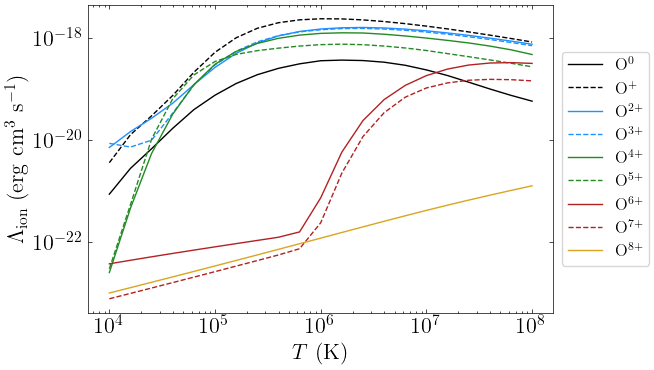

In [8]:
fig, ax = plt.subplots(1, figsize=(6,4))

for i in range(len(O_list)):
    
    s = O_list[i]
    
    ax.plot(T_grid, lam_dict_oxy_Ctot[s], 
            color=colors_list[i], 
            linestyle = ls_list[i], label=O_species[i])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')
    
#ax.set_xlim(10**4,10**6.9)
#ax.set_ylim(10**-2.9, 10**0.3)

Load in cooling due to recombination

In [9]:
lam_dict_oxy_rec = {s:np.zeros(len(T_grid)) for s in O_list} # Compute recombination cooling separately

# Load in the recombination file
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OIX/recomb t6.cool'.format(s)) as f:
    L = f.readlines()

# Read in lines with temperatures and recombination coefficients
te_str_list = [l for l in L if 'recombination coefficients' in l][1:] # First line is a title
rad_rec_str_list = [l for l in L if 'radiative used' in l]

# Isolate temperatures and recombination coefficients by splitting strings appropriately
te_list = [float(l.split('\t')[2]) for l in te_str_list]
rad_rec_list = [np.array(list(filter(None, l.split(' ')[-5-2*len(O_list):-4])), dtype=float) for l in rad_rec_str_list]

# Isolate unique temperatures and recombination coefficients
te_unique = []
rad_rec_unique = []

for i in range(len(te_list)-1):

    if te_list[i]!=te_list[i+1]:
        te_unique.append(te_list[i])
        rad_rec_unique.append(rad_rec_list[i])

te_unique.append(te_list[-1]) # Need to manually add last entry
rad_rec_unique.append(rad_rec_unique[-1])

te_unique = np.array(te_unique)
rad_rec_unique = np.array(rad_rec_unique)

# Compute recombination cooling, multiply kT (in erg) with recombination coefficient
for i in range(1,len(O_list)):
    s = O_list[i]
    lam_dict_oxy_rec[s] = ((constants.k_B*te_unique*units.K).to(units.erg).value)*rad_rec_unique[:,i-1]

In [10]:
rad_rec_unique.shape

(21, 8)

In [13]:
np.savetxt(rootdir+'cloudy_grids/alpha_oxy.dat', rad_rec_unique)

In [12]:
# OVI
np.log10(T_grid), rad_rec_unique[:,4]

(array([4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4,
        6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ]),
 array([1.58e-11, 1.16e-11, 8.45e-12, 6.13e-12, 4.41e-12, 3.15e-12,
        2.24e-12, 1.57e-12, 1.09e-12, 7.49e-13, 5.07e-13, 3.37e-13,
        2.20e-13, 1.41e-13, 8.87e-14, 5.45e-14, 3.28e-14, 1.93e-14,
        1.11e-14, 6.26e-15, 6.26e-15]))

In [13]:
# OVII
np.log10(T_grid), rad_rec_unique[:,5]

(array([4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4,
        6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ]),
 array([2.27e-11, 1.66e-11, 1.20e-11, 8.62e-12, 6.16e-12, 4.37e-12,
        3.07e-12, 2.15e-12, 1.48e-12, 1.02e-12, 6.90e-13, 4.62e-13,
        3.05e-13, 1.98e-13, 1.27e-13, 7.96e-14, 4.90e-14, 2.95e-14,
        1.75e-14, 1.01e-14, 1.01e-14]))

Generate total cooling

In [10]:
lam_dict_oxy = {s:lam_dict_oxy_Ctot[s]+lam_dict_oxy_rec[s] 
            for s in O_list}

In [11]:
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/lam_oxy.pkl', 'wb') as f:
    pickle.dump(lam_dict_oxy, f)

Load in the cooling efficiencies for Gnat and Ferland 2012

In [12]:
gf12_table_oxy = np.loadtxt(rootdir+'gf12_grids/table1h.dat')

(1e-24, 5e-17)

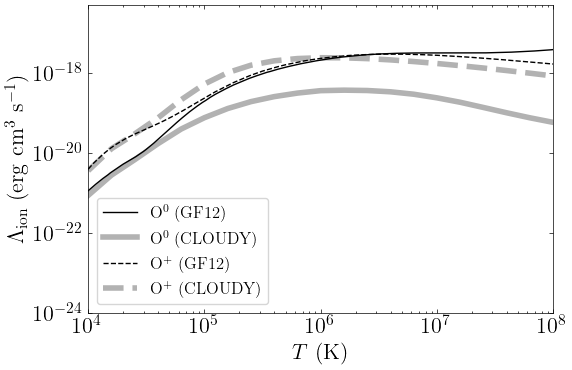

In [13]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label=O_species[0]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label=O_species[0]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1], label=O_species[1]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], label=O_species[1]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 5e-17)

(1e-24, 4e-18)

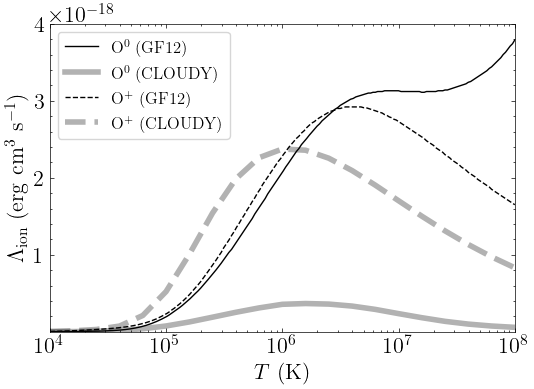

In [14]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label=O_species[0]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label=O_species[0]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1], label=O_species[1]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], label=O_species[1]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 4e-18)

(1e-24, 5e-17)

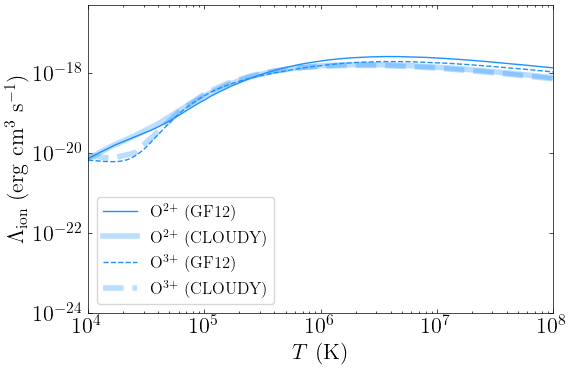

In [15]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label=O_species[2]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label=O_species[2]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3], label=O_species[3]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], label=O_species[3]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 5e-17)

(1e-24, 3e-18)

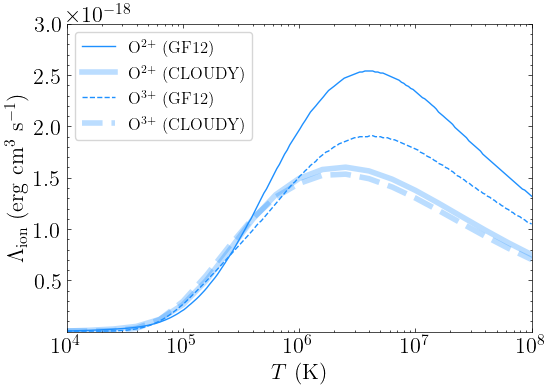

In [16]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label=O_species[2]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label=O_species[2]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3], label=O_species[3]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], label=O_species[3]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 3e-18)

(1e-24, 5e-17)

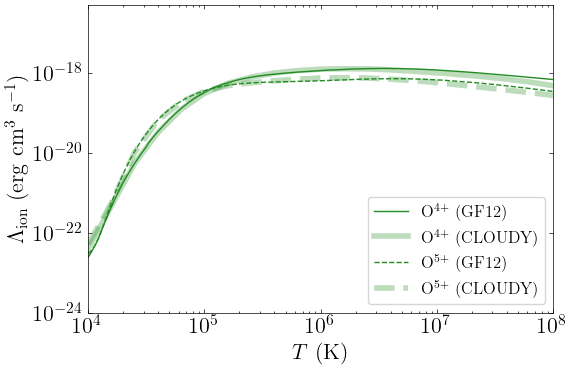

In [17]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=O_species[4]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=O_species[4]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=O_species[5]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=O_species[5]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 5e-17)

(1e-24, 1.8e-18)

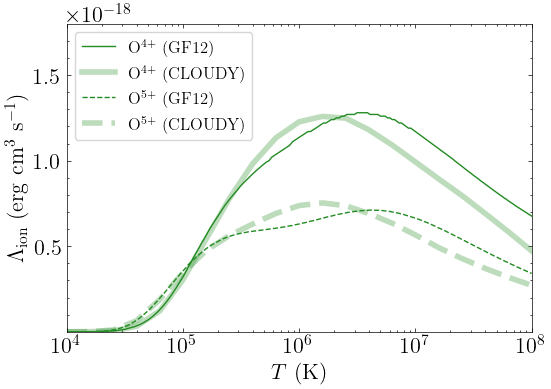

In [18]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=O_species[4]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=O_species[4]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=O_species[5]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=O_species[5]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 1.8e-18)

(1e-24, 5e-17)

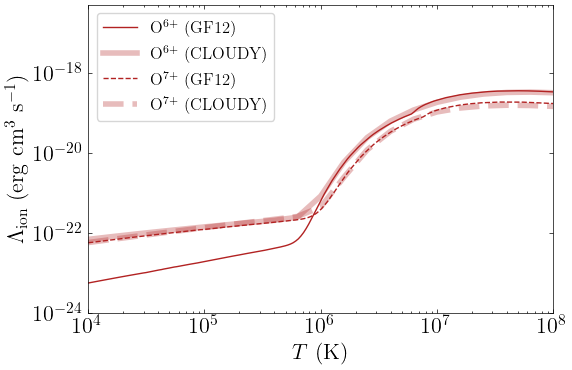

In [19]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=O_species[6]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=O_species[6]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,8], 
            color=colors_list[7], 
            linestyle = ls_list[7], label=O_species[7]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[7]], 
        color=colors_list[7], 
        linestyle = ls_list[7], label=O_species[7]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 5e-17)

(1e-24, 4e-19)

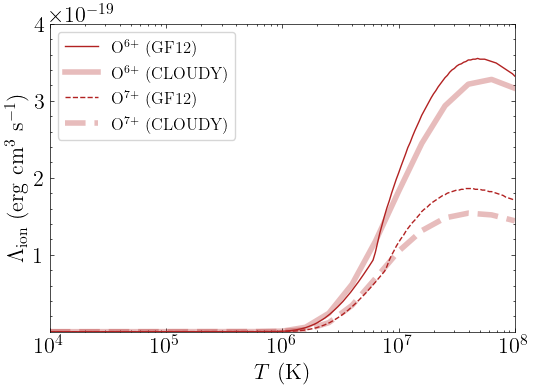

In [20]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=O_species[6]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=O_species[6]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,8], 
            color=colors_list[7], 
            linestyle = ls_list[7], label=O_species[7]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[7]], 
        color=colors_list[7], 
        linestyle = ls_list[7], label=O_species[7]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 4e-19)

(1e-24, 5e-17)

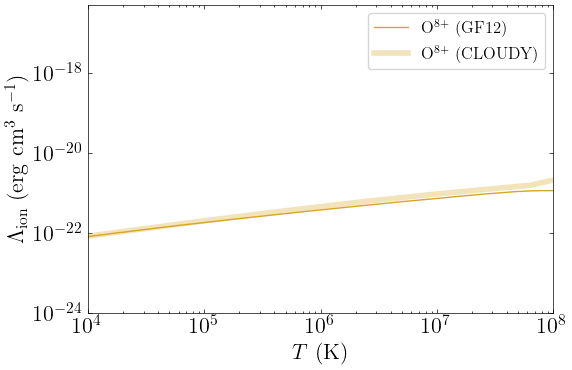

In [21]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,9], 
            color=colors_list[8], 
            linestyle = ls_list[8], label=O_species[8]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[8]], 
        color=colors_list[8], 
        linestyle = ls_list[8], label=O_species[8]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 5e-17)

(1e-24, 2e-21)

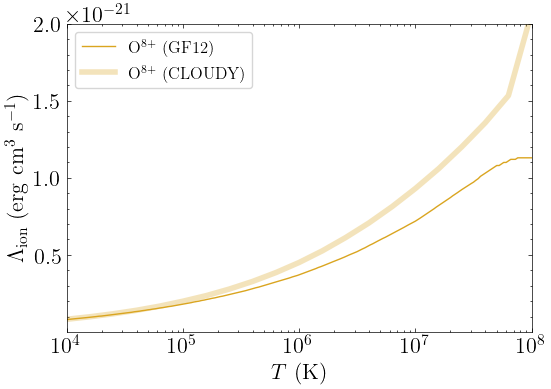

In [22]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_oxy[:,0], gf12_table_oxy[:,9], 
            color=colors_list[8], 
            linestyle = ls_list[8], label=O_species[8]+' (GF12)')
    
ax.plot(T_grid, lam_dict_oxy[O_list[8]], 
        color=colors_list[8], 
        linestyle = ls_list[8], label=O_species[8]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 2e-21)

In [23]:
x_list = [2e+4, 2e+4, 2e+4, 2e+4, 1e+7, 1e+7, 1e+7, 1e+7, 1e+7]
y_list = [7e-22, 1e-19, 1e-19, 9e-22, 2e-18, 1e-19, 2e-20, 4e-19, 1e-22]

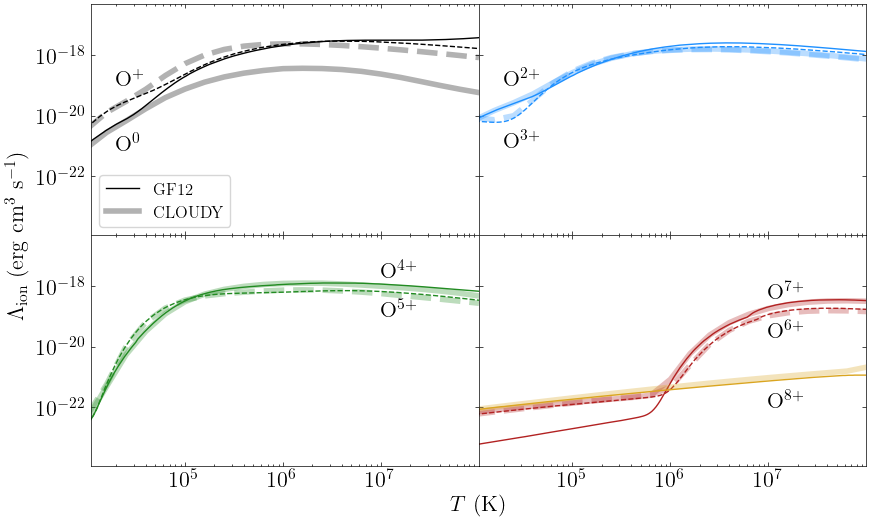

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(5*2, 3*2), sharex=True, sharey=True)

# OI and OII

axes[0,0].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label='GF12')
    
axes[0,0].plot(T_grid, lam_dict_oxy[O_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label='CLOUDY', lw=4, alpha=.3)

axes[0,0].text(x_list[0], y_list[0], O_species[0])
    
axes[0,0].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1])
    
axes[0,0].plot(T_grid, lam_dict_oxy[O_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], lw=4, alpha=.3)    

axes[0,0].text(x_list[1], y_list[1], O_species[1])

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

axes[0,0].legend()

axes[0,0].set_xlim(1.1e+4, 9.9e+7)
axes[0,0].set_ylim(1.1e-24, 4.9e-17)

# OIII and OIV

axes[0,1].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label='GF12')
    
axes[0,1].plot(T_grid, lam_dict_oxy[O_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label='CLOUDY', lw=4, alpha=.3)

axes[0,1].text(x_list[2], y_list[2], O_species[2])

    
axes[0,1].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3])
    
axes[0,1].plot(T_grid, lam_dict_oxy[O_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], lw=4, alpha=.3) 

axes[0,1].text(x_list[3], y_list[3], O_species[3])

#axes[0,1].legend()

# OV and OVI

axes[1,0].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=O_species[4]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_oxy[O_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=O_species[4]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,0].text(x_list[4], y_list[4], O_species[4])
    
axes[1,0].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=O_species[5]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_oxy[O_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=O_species[5]+' (CLOUDY)', lw=4, alpha=.3)    

axes[1,0].text(x_list[5], y_list[5], O_species[5])

#axes[1,0].legend()

# OVII, OVIII, and OIX

axes[1,1].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=O_species[6]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_oxy[O_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=O_species[6]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,1].text(x_list[6], y_list[6], O_species[6])

    
axes[1,1].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,8], 
            color=colors_list[7], 
            linestyle = ls_list[7], label=O_species[7]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_oxy[O_list[7]], 
        color=colors_list[7], 
        linestyle = ls_list[7], label=O_species[7]+' (CLOUDY)', lw=4, alpha=.3)    

axes[1,1].text(x_list[7], y_list[7], O_species[7])

axes[1,1].plot(gf12_table_oxy[:,0], gf12_table_oxy[:,9], 
            color=colors_list[8], 
            linestyle = ls_list[8], label=O_species[8]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_oxy[O_list[8]], 
        color=colors_list[8], 
        linestyle = ls_list[8], label=O_species[8]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,1].text(x_list[8], y_list[8], O_species[8])

#axes[1,1].legend()

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

plt.subplots_adjust(wspace=0, hspace=0)

## Version control

### Version 13.03

In [25]:
T_grid_v1303 = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1303/coll t6.cool', skiprows=1)[:,1]

In [26]:
lam_OII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_OII_v1303_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1303/coll t6.cool', skiprows=1)[:,10]
lam_OII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_OII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_OII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1303.dat', skiprows=1)[:,1]

lam_OVI_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVI_v1303/coll t6.cool', skiprows=1)[:,2]
lam_OVI_v1303_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVI_v1303/coll t6.cool', skiprows=1)[:,10]
lam_OVI_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVI_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_OVI_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVI_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_OVI_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1303.dat', skiprows=1)[:,5]

lam_OVII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_OVII_v1303_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1303/coll t6.cool', skiprows=1)[:,10]
lam_OVII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_OVII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_OVII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1303.dat', skiprows=1)[:,6]

lam_OVIII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVIII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_OVIII_v1303_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVIII_v1303/coll t6.cool', skiprows=1)[:,10]
lam_OVIII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVIII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_OVIII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVIII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_OVIII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1303.dat', skiprows=1)[:,7]

lam_OIX_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OIX_v1303/coll t6.cool', skiprows=1)[:,2]
lam_OIX_v1303_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OIX_v1303/coll t6.cool', skiprows=1)[:,10]
lam_OIX_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OIX_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_OIX_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OIX_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_OIX_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1303.dat', skiprows=1)[:,8]

### Version 13.05

In [27]:
T_grid_v1305 = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OI_v1305/coll t6.cool', skiprows=1)[:,1]

In [28]:
lam_OI_v1305_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OI_v1305/coll t6.cool', skiprows=1)[:,2]
lam_OI_v1305_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OI_v1305/coll t6.cool', skiprows=1)[:,10]
lam_OI_v1305_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OI_v1305/coll t6.cool', skiprows=1)[:,-9]
lam_OI_v1305_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OI_v1305/coll t6.cool', skiprows=1)[:,-8]
lam_OII_v1305_rec = (constants.k_B*T_grid_v1305*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1305.dat', skiprows=1)[:,1]

lam_OII_v1305_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1305/coll t6.cool', skiprows=1)[:,2]
lam_OII_v1305_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1305/coll t6.cool', skiprows=1)[:,10]
lam_OII_v1305_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1305/coll t6.cool', skiprows=1)[:,-9]
lam_OII_v1305_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OII_v1305/coll t6.cool', skiprows=1)[:,-8]
lam_OVI_v1305_rec = (constants.k_B*T_grid_v1305*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1305.dat', skiprows=1)[:,5]

lam_OVII_v1305_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1305/coll t6.cool', skiprows=1)[:,2]
lam_OVII_v1305_O = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1305/coll t6.cool', skiprows=1)[:,10]
lam_OVII_v1305_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1305/coll t6.cool', skiprows=1)[:,-9]
lam_OVII_v1305_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/OVII_v1305/coll t6.cool', skiprows=1)[:,-8]
lam_OVII_v1305_rec = (constants.k_B*T_grid_v1305*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/O/oxygen_recomb_v1305.dat', skiprows=1)[:,6]

### Visual comparison

#### $\mathrm{O}^0$

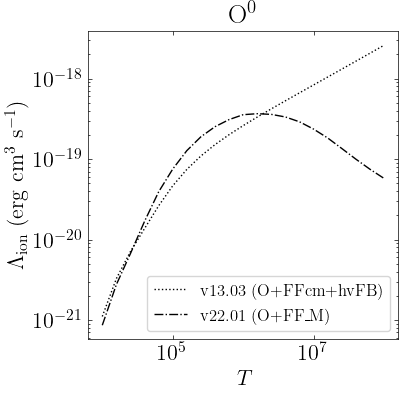

In [29]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1305, lam_OI_v1305_O+lam_OI_v1305_FFcm+lam_OI_v1305_hvFB, color='black', linestyle=':', label='v13.03 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OI']+lam_dict_oxy_FF_M['OI'], color='black', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^0$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{O}^+$

In [30]:
lam_OII_v1303_hvFB, lam_OII_v1303_rec

(array([3.7545e-25, 4.2729e-25, 5.0392e-25, 6.5497e-25, 9.5908e-25,
        1.5078e-24, 2.3690e-24, 3.5382e-24, 4.9232e-24, 6.3764e-24,
        7.7438e-24, 8.8963e-24, 9.7427e-24, 1.0233e-23, 1.0356e-23,
        1.0136e-23, 9.6278e-24, 8.9017e-24, 8.0356e-24, 7.1025e-24,
        6.1642e-24]),
 array([3.75536528e-25, 4.26697167e-25, 5.02867572e-25, 6.54083706e-25,
        9.58247722e-25, 1.50490741e-24, 2.36324585e-24, 3.53741327e-24,
        4.92486555e-24, 6.37670303e-24, 7.74544089e-24, 8.90593574e-24,
        9.74522675e-24, 1.02234932e-23, 1.03664981e-23, 1.01339637e-23,
        9.62803864e-24, 8.91289421e-24, 8.02489253e-24, 7.09974449e-24,
        6.15769454e-24]))

In [31]:
lam_OII_v1303_Ctot, lam_OII_v1303_O+lam_OII_v1303_FFcm+lam_OII_v1303_hvFB

(array([3.5652e-21, 1.2514e-20, 2.6972e-20, 4.9709e-20, 1.0120e-19,
        2.1517e-19, 4.0773e-19, 6.4686e-19, 8.7373e-19, 1.0455e-18,
        1.1484e-18, 1.1874e-18, 1.1748e-18, 1.1241e-18, 1.0480e-18,
        9.5738e-19, 8.6062e-19, 7.6378e-19, 6.7090e-19, 5.8441e-19,
        5.0562e-19]),
 array([3.56515219e-21, 1.25136559e-20, 2.69617995e-20, 4.90710366e-20,
        9.12494503e-20, 1.55982137e-19, 2.23843175e-19, 2.73454560e-19,
        2.96906208e-19, 2.97737976e-19, 2.83459719e-19, 2.61021336e-19,
        2.35322750e-19, 2.09343937e-19, 1.84674919e-19, 1.62075765e-19,
        1.41786620e-19, 1.23807598e-19, 1.07978863e-19, 9.41235975e-20,
        8.20199982e-20]))

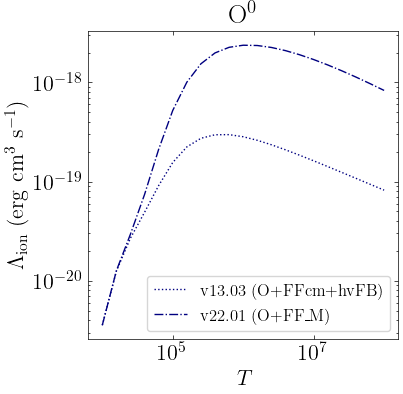

In [32]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_OII_v1303_O+lam_OII_v1303_FFcm+lam_OII_v1303_hvFB, color='navy', linestyle=':', label='v13.03 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OII']+lam_dict_oxy_FF_M['OII'], color='navy', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^0$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{O}^{5+}$

In [33]:
lam_OVI_v1303_hvFB, lam_OVI_v1303_rec

(array([2.1867e-23, 2.5386e-23, 2.9318e-23, 3.3668e-23, 3.8421e-23,
        4.3537e-23, 4.8933e-23, 5.4484e-23, 6.0007e-23, 6.5265e-23,
        6.9971e-23, 7.3810e-23, 7.6470e-23, 7.7687e-23, 7.7293e-23,
        7.5250e-23, 7.1667e-23, 6.6788e-23, 6.0952e-23, 5.4544e-23,
        4.7939e-23]),
 array([2.18142542e-23, 2.53830110e-23, 2.93050413e-23, 3.36935556e-23,
        3.84170223e-23, 4.34904435e-23, 4.90154694e-23, 5.44484199e-23,
        5.99118689e-23, 6.52479585e-23, 6.99989043e-23, 7.37420232e-23,
        7.62971489e-23, 7.75006744e-23, 7.72696118e-23, 7.52453705e-23,
        7.17726517e-23, 6.69334079e-23, 6.10111692e-23, 5.45330067e-23,
        4.79085203e-23]))

In [34]:
lam_OVI_v1303_Ctot, lam_OVI_v1303_O+lam_OVI_v1303_FFcm+lam_OVI_v1303_hvFB

(array([2.9647e-23, 5.5905e-22, 1.0820e-20, 6.6757e-20, 1.9494e-19,
        3.5583e-19, 4.8543e-19, 5.5716e-19, 5.8383e-19, 5.8578e-19,
        5.7281e-19, 5.4847e-19, 5.1622e-19, 4.7956e-19, 4.4094e-19,
        4.0169e-19, 3.6260e-19, 3.2434e-19, 2.8752e-19, 2.5276e-19,
        2.2050e-19]),
 array([2.96471000e-23, 5.59052900e-22, 1.08196629e-20, 6.67577950e-20,
        1.94938834e-19, 3.55836885e-19, 4.85356149e-19, 5.56006710e-19,
        5.77728702e-19, 5.69562275e-19, 5.44707621e-19, 5.10785365e-19,
        4.72445613e-19, 4.32508747e-19, 3.92495253e-19, 3.53195700e-19,
        3.15151987e-19, 2.78815008e-19, 2.44656982e-19, 2.13050864e-19,
        1.84280359e-19]))

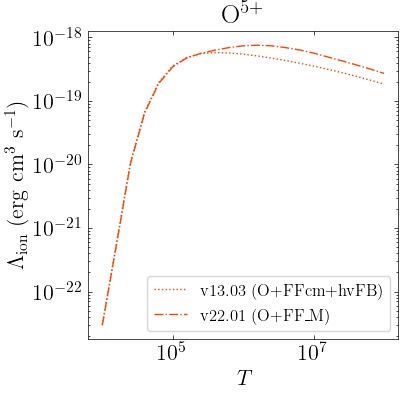

In [35]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_OVI_v1303_O+lam_OVI_v1303_FFcm+lam_OVI_v1303_hvFB, color='orangered', linestyle=':', label='v13.03 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OVI']+lam_dict_oxy_FF_M['OVI'], color='orangered', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^{5+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{O}^{6+}$

In [36]:
lam_OVII_v1303_hvFB, lam_OVII_v1303_rec

(array([3.1336e-23, 3.6227e-23, 4.1586e-23, 4.7402e-23, 5.3654e-23,
        6.0295e-23, 6.7252e-23, 7.4413e-23, 8.1617e-23, 8.8651e-23,
        9.5243e-23, 1.0107e-22, 1.0578e-22, 1.0900e-22, 1.1044e-22,
        1.0985e-22, 1.0717e-22, 1.0247e-22, 9.6002e-23, 8.8166e-23,
        7.9433e-23]),
 array([3.13407323e-23, 3.63239640e-23, 4.16166267e-23, 4.73798449e-23,
        5.36618725e-23, 6.03343613e-23, 6.71774514e-23, 7.45631228e-23,
        8.13482257e-23, 8.88556979e-23, 9.52647810e-23, 1.01094406e-22,
        1.05775593e-22, 1.08830734e-22, 1.10634055e-22, 1.09899660e-22,
        1.07221339e-22, 1.02307541e-22, 9.61887803e-23, 8.79845636e-23,
        7.93873175e-23]))

In [37]:
lam_OVII_v1303_Ctot, lam_OVII_v1303_O+lam_OVII_v1303_FFcm+lam_OVII_v1303_hvFB

(array([3.6864e-23, 4.3286e-23, 5.0608e-23, 5.8946e-23, 6.8429e-23,
        7.9208e-23, 9.1607e-23, 1.0581e-22, 1.2216e-22, 1.5618e-22,
        8.0470e-22, 7.0336e-21, 3.1350e-20, 8.3310e-20, 1.5815e-19,
        2.4054e-19, 3.1392e-19, 3.6618e-19, 3.9183e-19, 3.9212e-19,
        3.7294e-19]),
 array([3.68644000e-23, 4.32856000e-23, 5.06088000e-23, 5.89460000e-23,
        6.84290000e-23, 7.92070000e-23, 9.16070000e-23, 1.05812003e-22,
        1.22163934e-22, 1.56181000e-22, 8.04697000e-22, 7.03359700e-21,
        3.13500100e-20, 8.33099800e-20, 1.58143840e-19, 2.40531420e-19,
        3.13928180e-19, 3.66174910e-19, 3.91824162e-19, 3.92119776e-19,
        3.72936933e-19]))

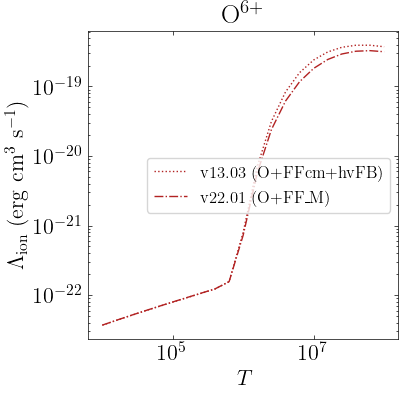

In [38]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_OVII_v1303_O+lam_OVII_v1303_FFcm+lam_OVII_v1303_hvFB, color='firebrick', linestyle=':', label='v13.03 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OVII']+lam_dict_oxy_FF_M['OVII'], color='firebrick', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^{6+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{O}^{7+}$

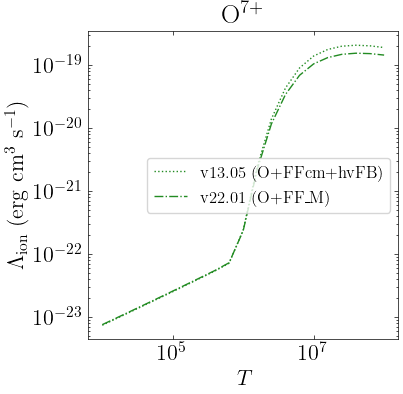

In [39]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_OVIII_v1303_O+lam_OVIII_v1303_FFcm+lam_OVIII_v1303_hvFB, color='forestgreen', linestyle=':', label='v13.05 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OVIII']+lam_dict_oxy_FF_M['OVIII'], color='forestgreen', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^{7+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{O}^{8+}$

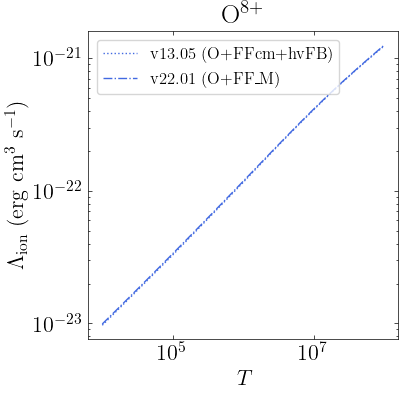

In [46]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_OIX_v1303_O+lam_OIX_v1303_FFcm+lam_OIX_v1303_hvFB, color='royalblue', linestyle=':', label='v13.05 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_oxy_O['OIX']+lam_dict_oxy_FF_M['OIX'], color='royalblue', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{O}^{8+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

# Carbon

In [14]:
T_grid = 10**np.arange(4, 8.2, 0.2)

In [15]:
C_list = ['CI', 'CII', 'CIII', 'CIV', 'CV', 'CVI', 'CVII']

C_species = [r'$\mathrm{C}^0$', r'$\mathrm{C}^+$', r'$\mathrm{C}^{2+}$', r'$\mathrm{C}^{3+}$',
            r'$\mathrm{C}^{4+}$', r'$\mathrm{C}^{5+}$', r'$\mathrm{C}^{6+}$', r'$\mathrm{C}^{6+}$'] 

Load in cooling due to collisional ionization + free-free

In [16]:
lam_dict_carb_C = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/{}/coll t6.cool'.format(s), skiprows=1)[:,8] for s in C_list} # O cooling
lam_dict_carb_FF_M = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/{}/coll t6.cool'.format(s), skiprows=1)[:,-8] for s in C_list} # FF cooling
lam_dict_carb_Ctot = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/{}/coll t6.cool'.format(s), skiprows=1)[:,2] for s in C_list}

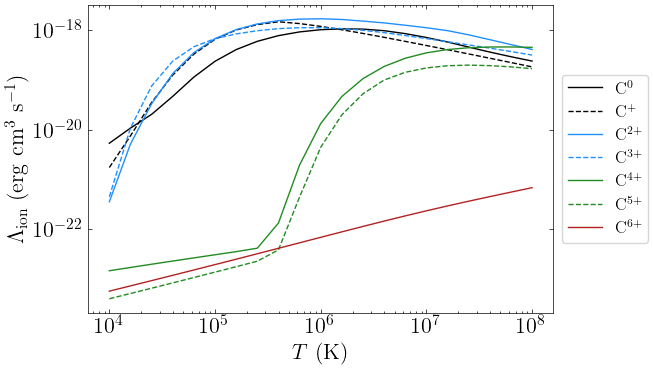

In [17]:
fig, ax = plt.subplots(1, figsize=(6,4))

for i in range(len(C_list)):
    
    s = C_list[i]
    
    
    ax.plot(T_grid, lam_dict_carb_Ctot[s], 
            color=colors_list[i], 
            linestyle = ls_list[i], label=C_species[i])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')
    
#ax.set_xlim(10**4,10**6.9)
#ax.set_ylim(10**-2.9, 10**0.3)

Load in cooling due to recombination

In [18]:
lam_dict_carb_rec = {s:np.zeros(len(T_grid)) for s in C_list} # Compute recombination cooling separately

# Load in the recombination file
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVII/recomb t6.cool'.format(s)) as f:
    L = f.readlines()

# Read in lines with temperatures and recombination coefficients
te_str_list = [l for l in L if 'recombination coefficients' in l][1:] # First line is a title
rad_rec_str_list = [l for l in L if 'radiative used' in l]

# Isolate temperatures and recombination coefficients by splitting strings appropriately
te_list = [float(l.split('\t')[2]) for l in te_str_list]
rad_rec_list = [np.array(list(filter(None, l.split(' ')[-5-2*len(C_list):-4])), dtype=float) for l in rad_rec_str_list]

# Isolate unique temperatures and recombination coefficients
te_unique = []
rad_rec_unique = []

for i in range(len(te_list)-1):

    if te_list[i]!=te_list[i+1]:
        te_unique.append(te_list[i])
        rad_rec_unique.append(rad_rec_list[i])

te_unique.append(te_list[-1]) # Need to manually add last entry
rad_rec_unique.append(rad_rec_unique[-1])

te_unique = np.array(te_unique)
rad_rec_unique = np.array(rad_rec_unique)

# Compute recombination cooling, multiply kT (in erg) with recombination coefficient
for i in range(1,len(C_list)):
    s = C_list[i]
    lam_dict_carb_rec[s] = ((constants.k_B*te_unique*units.K).to(units.erg).value)*rad_rec_unique[:,i-1]

In [22]:
np.savetxt(rootdir+'cloudy_grids/alpha_carb.dat', rad_rec_unique)

In [19]:
# CIV
np.log10(T_grid), rad_rec_unique[:,2]

(array([4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4,
        6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ]),
 array([5.14e-12, 3.75e-12, 2.72e-12, 1.96e-12, 1.40e-12, 9.95e-13,
        6.99e-13, 4.86e-13, 3.34e-13, 2.26e-13, 1.50e-13, 9.80e-14,
        6.27e-14, 3.93e-14, 2.41e-14, 1.44e-14, 8.47e-15, 4.86e-15,
        2.74e-15, 1.52e-15, 1.52e-15]))

In [20]:
# CV
np.log10(T_grid), rad_rec_unique[:,3]

(array([4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4,
        6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ]),
 array([8.67e-12, 6.24e-12, 4.46e-12, 3.17e-12, 2.23e-12, 1.56e-12,
        1.09e-12, 7.49e-13, 5.12e-13, 3.46e-13, 2.31e-13, 1.53e-13,
        9.92e-14, 6.35e-14, 3.99e-14, 2.47e-14, 1.49e-14, 8.86e-15,
        5.15e-15, 2.94e-15, 2.94e-15]))

Generate total cooling

In [25]:
lam_dict_carb = {s:lam_dict_carb_Ctot[s]+lam_dict_carb_rec[s] for s in C_list}

In [26]:
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/lam_carb.pkl', 'wb') as f:
    pickle.dump(lam_dict_carb, f)

Load in the cooling efficiencies for Gnat and Ferland 2012

In [54]:
gf12_table_carb = np.loadtxt(rootdir+'gf12_grids/table1f.dat')

In [55]:
#gf12_table

(1e-24, 1e-17)

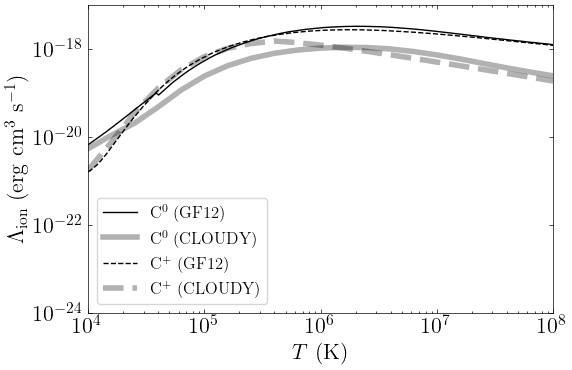

In [56]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label=C_species[0]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label=C_species[0]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1], label=C_species[1]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], label=C_species[1]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 1e-17)

(1e-24, 1e-17)

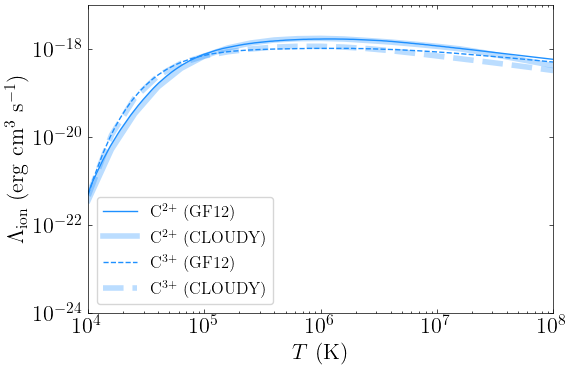

In [57]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label=C_species[2]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label=C_species[2]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3], label=C_species[3]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], label=C_species[3]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 1e-17)

(1e-24, 1e-17)

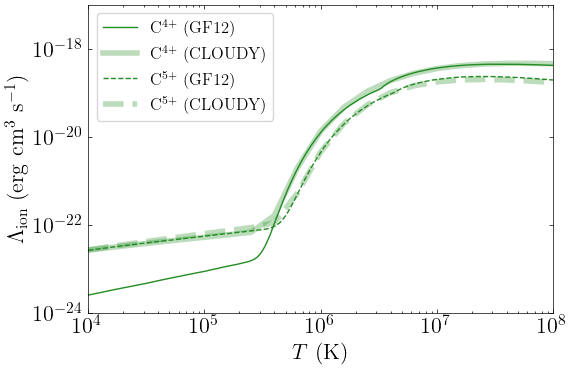

In [58]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=C_species[4]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=C_species[4]+' (CLOUDY)', lw=4, alpha=.3)
    
ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=C_species[5]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=C_species[5]+' (CLOUDY)', lw=4, alpha=.3)    
    
ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 1e-17)

(1e-24, 1e-17)

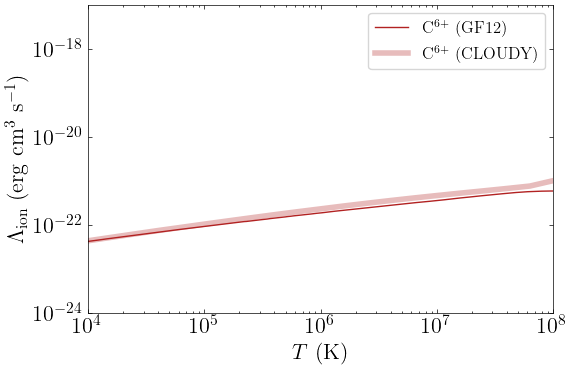

In [59]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(gf12_table_carb[:,0], gf12_table_carb[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=C_species[6]+' (GF12)')
    
ax.plot(T_grid, lam_dict_carb[C_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=C_species[6]+' (CLOUDY)', lw=4, alpha=.3)

ax.legend()

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e+4, 1e+8)
ax.set_ylim(1e-24, 1e-17)

In [60]:
x_list = [2e+4, 2e+4, 2e+4, 2e+4, 1e+7, 1e+7, 1e+7]
y_list = [3e-21, 1e-19, 3e-19, 3e-21, 7e-19, 3e-20, 8e-22]

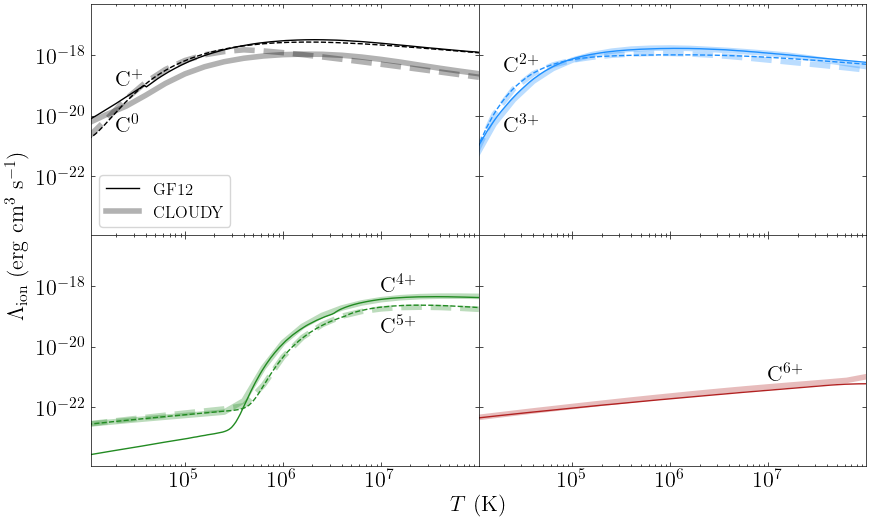

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(5*2, 3*2), sharex=True, sharey=True)

# CI and CII

axes[0,0].plot(gf12_table_carb[:,0], gf12_table_carb[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label='GF12')
    
axes[0,0].plot(T_grid, lam_dict_carb[C_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label='CLOUDY', lw=4, alpha=.3)

axes[0,0].text(x_list[0], y_list[0], C_species[0])
    
axes[0,0].plot(gf12_table_carb[:,0], gf12_table_carb[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1])
    
axes[0,0].plot(T_grid, lam_dict_carb[C_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], lw=4, alpha=.3)    

axes[0,0].text(x_list[1], y_list[1], C_species[1])

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

axes[0,0].legend()

axes[0,0].set_xlim(1.1e+4, 9.9e+7)
axes[0,0].set_ylim(1.1e-24, 4.9e-17)

# CIII and CIV

axes[0,1].plot(gf12_table_carb[:,0], gf12_table_carb[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label='GF12')
    
axes[0,1].plot(T_grid, lam_dict_carb[C_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label='CLOUDY', lw=4, alpha=.3)

axes[0,1].text(x_list[2], y_list[2], C_species[2])

    
axes[0,1].plot(gf12_table_carb[:,0], gf12_table_carb[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3])
    
axes[0,1].plot(T_grid, lam_dict_carb[C_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], lw=4, alpha=.3) 

axes[0,1].text(x_list[3], y_list[3], C_species[3])

#axes[0,1].legend()

# CV and CVI

axes[1,0].plot(gf12_table_carb[:,0], gf12_table_carb[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=C_species[4]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_carb[C_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=C_species[4]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,0].text(x_list[4], y_list[4], C_species[4])
    
axes[1,0].plot(gf12_table_carb[:,0], gf12_table_carb[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=C_species[5]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_carb[C_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=C_species[5]+' (CLOUDY)', lw=4, alpha=.3)    

axes[1,0].text(x_list[5], y_list[5], C_species[5])

#axes[1,0].legend()

# CVII

axes[1,1].plot(gf12_table_carb[:,0], gf12_table_carb[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=C_species[6]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_carb[C_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=C_species[6]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,1].text(x_list[6], y_list[6], C_species[6])


#axes[1,1].legend()

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

#ax_label.set_title('Without recombination (default)')

plt.subplots_adjust(wspace=0, hspace=0)

## Version control

### Version 13.03

In [62]:
T_grid_v1303 = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CIV_v1303/coll t6.cool', skiprows=1)[:,1]

In [63]:
lam_CIV_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CIV_v1303/coll t6.cool', skiprows=1)[:,2]
lam_CIV_v1303_C = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CIV_v1303/coll t6.cool', skiprows=1)[:,8]
lam_CIV_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CIV_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_CIV_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CIV_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_CIV_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/carbon_recomb_v1303.dat', skiprows=1)[:,3]

lam_CV_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CV_v1303/coll t6.cool', skiprows=1)[:,2]
lam_CV_v1303_C = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CV_v1303/coll t6.cool', skiprows=1)[:,8]
lam_CV_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CV_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_CV_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CV_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_CV_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/carbon_recomb_v1303.dat', skiprows=1)[:,4]

lam_CVI_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVI_v1303/coll t6.cool', skiprows=1)[:,2]
lam_CVI_v1303_C = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVI_v1303/coll t6.cool', skiprows=1)[:,8]
lam_CVI_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVI_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_CVI_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVI_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_CVI_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/carbon_recomb_v1303.dat', skiprows=1)[:,5]

lam_CVII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_CVII_v1303_C = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVII_v1303/coll t6.cool', skiprows=1)[:,8]
lam_CVII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_CVII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/CVII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_CVII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/C/carbon_recomb_v1303.dat', skiprows=1)[:,6]

#### $\mathrm{C}^{3+}$

In [64]:
lam_CIV_v1303_hvFB, lam_CIV_v1303_rec

(array([7.0940e-24, 8.1977e-24, 9.4221e-24, 1.0763e-23, 1.2209e-23,
        1.3736e-23, 1.5306e-23, 1.6867e-23, 1.8348e-23, 1.9666e-23,
        2.0731e-23, 2.1454e-23, 2.1761e-23, 2.1608e-23, 2.0989e-23,
        1.9940e-23, 1.8535e-23, 1.6872e-23, 1.5061e-23, 1.3207e-23,
        1.1397e-23]),
 array([7.09653586e-24, 8.20571475e-24, 9.43310205e-24, 1.07731434e-23,
        1.21958801e-23, 1.37374575e-23, 1.52954523e-23, 1.68547338e-23,
        1.83583158e-23, 1.96876350e-23, 2.07097350e-23, 2.14442679e-23,
        2.17446874e-23, 2.16012518e-23, 2.09943365e-23, 1.98813456e-23,
        1.85339744e-23, 1.68547338e-23, 1.50604148e-23, 1.32412413e-23,
        1.14041607e-23]))

In [65]:
lam_CIV_v1303_Ctot, lam_CIV_v1303_C+lam_CIV_v1303_FFcm+lam_CIV_v1303_hvFB

(array([4.6491e-22, 1.1300e-20, 7.9299e-20, 2.5271e-19, 4.9225e-19,
        7.0927e-19, 8.5584e-19, 9.3369e-19, 9.5931e-19, 9.4704e-19,
        9.0866e-19, 8.5384e-19, 7.8965e-19, 7.2078e-19, 6.5038e-19,
        5.8072e-19, 5.1357e-19, 4.5024e-19, 3.9166e-19, 3.3836e-19,
        2.9055e-19]),
 array([4.64916700e-22, 1.13000488e-20, 7.92997996e-20, 2.52713819e-19,
        4.92236141e-19, 7.08918795e-19, 8.53141851e-19, 9.24535329e-19,
        9.40519270e-19, 9.18433716e-19, 8.71878714e-19, 8.10804435e-19,
        7.42100863e-19, 6.70408108e-19, 5.98826345e-19, 5.29535887e-19,
        4.64057631e-19, 4.03432029e-19, 3.48269961e-19, 2.98792527e-19,
        2.54981027e-19]))

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

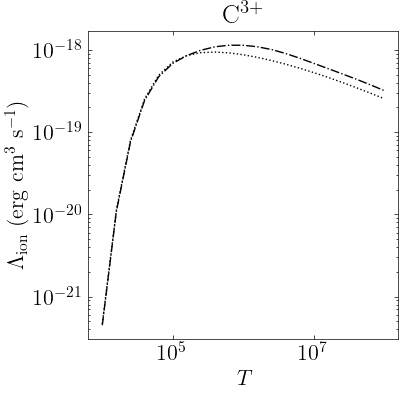

In [66]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_CIV_v1303_C+lam_CIV_v1303_FFcm+lam_CIV_v1303_hvFB, color='black', linestyle=':', label='v13.03 (O+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_carb_C['CIV']+lam_dict_carb_FF_M['CIV'], color='black', linestyle='-.', label=r'v22.01 (O+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{C}^{3+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

#ax.legend()

#### $\mathrm{C}^{4+}$

In [67]:
lam_CV_v1303_hvFB, lam_CV_v1303_rec

(array([1.1963e-23, 1.3652e-23, 1.5472e-23, 1.7413e-23, 1.9463e-23,
        2.1600e-23, 2.3789e-23, 2.5987e-23, 2.8131e-23, 3.0144e-23,
        3.1932e-23, 3.3391e-23, 3.4415e-23, 3.4906e-23, 3.4791e-23,
        3.4037e-23, 3.2657e-23, 3.0718e-23, 2.8330e-23, 2.5633e-23,
        2.2778e-23]),
 array([1.19702268e-23, 1.36543093e-23, 1.54675129e-23, 1.74239105e-23,
        1.94262947e-23, 2.15381244e-23, 2.38512775e-23, 2.59757112e-23,
        2.81420889e-23, 3.01412465e-23, 3.18929919e-23, 3.34793162e-23,
        3.44030781e-23, 3.49027860e-23, 3.47582583e-23, 3.41020303e-23,
        3.26040399e-23, 3.07269427e-23, 2.83069839e-23, 2.56113482e-23,
        2.27807085e-23]))

In [68]:
lam_CV_v1303_Ctot, lam_CV_v1303_C+lam_CV_v1303_FFcm+lam_CV_v1303_hvFB

(array([1.4479e-23, 1.6873e-23, 1.9601e-23, 2.2709e-23, 2.6260e-23,
        3.0327e-23, 3.5066e-23, 4.1156e-23, 1.3719e-22, 2.1669e-21,
        1.5664e-20, 5.6673e-20, 1.3185e-19, 2.3071e-19, 3.3327e-19,
        4.2079e-19, 4.8233e-19, 5.1597e-19, 5.2621e-19, 5.2007e-19,
        5.0421e-19]),
 array([1.44782000e-23, 1.68730000e-23, 1.96008000e-23, 2.27087000e-23,
        2.62596000e-23, 3.03274000e-23, 3.50661933e-23, 4.11550400e-23,
        1.37187000e-22, 2.16691100e-21, 1.56641310e-20, 5.66725570e-20,
        1.31855774e-19, 2.30710014e-19, 3.33266543e-19, 4.20785697e-19,
        4.82328777e-19, 5.15976398e-19, 5.26209990e-19, 5.20071393e-19,
        5.04212948e-19]))

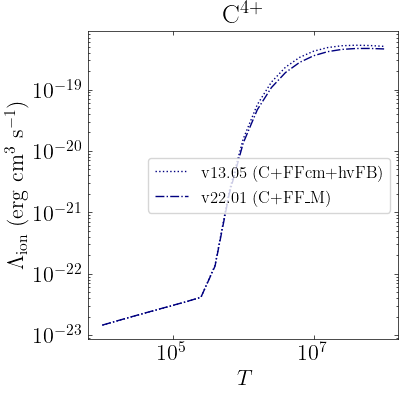

In [69]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_CV_v1303_C+lam_CV_v1303_FFcm+lam_CV_v1303_rec, color='navy', linestyle=':', label='v13.05 (C+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_carb_C['CV']+lam_dict_carb_FF_M['CV'], color='navy', linestyle='-.', label=r'v22.01 (C+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{C}^{4+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{C}^{5+}$

In [70]:
lam_CVI_v1303_hvFB, lam_CVI_v1303_rec

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([2.30568383e-23, 2.71335634e-23, 3.16979973e-23, 3.68815266e-23,
        4.26855804e-23, 4.90130395e-23, 5.60176794e-23, 6.34653557e-23,
        7.14545225e-23, 7.97959012e-23, 8.82234711e-23, 9.64992055e-23,
        1.04041567e-22, 1.10479685e-22, 1.15860861e-22, 1.18597749e-22,
        1.19037569e-22, 1.16873360e-22, 1.12128635e-22, 1.05407249e-22,
        9.66454300e-23]))

In [71]:
lam_CVI_v1303_Ctot, lam_CVI_v1303_C+lam_CVI_v1303_FFcm+lam_CVI_v1303_hvFB

(array([3.8787e-24, 4.9584e-24, 6.3464e-24, 8.1284e-24, 1.0414e-23,
        1.3349e-23, 1.7217e-23, 2.2249e-23, 3.7985e-23, 4.6225e-22,
        4.8705e-21, 2.3094e-20, 6.3735e-20, 1.2365e-19, 1.8063e-19,
        2.2401e-19, 2.4926e-19, 2.5671e-19, 2.5030e-19, 2.3501e-19,
        2.1522e-19]),
 array([3.87720000e-24, 4.95690000e-24, 6.34490000e-24, 8.12700000e-24,
        1.04130000e-23, 1.33480000e-23, 1.72160013e-23, 2.22472550e-23,
        3.79841000e-23, 4.62250000e-22, 4.87055000e-21, 2.30935550e-20,
        6.37351430e-20, 1.23651060e-19, 1.80627960e-19, 2.24010450e-19,
        2.49260320e-19, 2.56708220e-19, 2.50296030e-19, 2.35006320e-19,
        2.15222420e-19]))

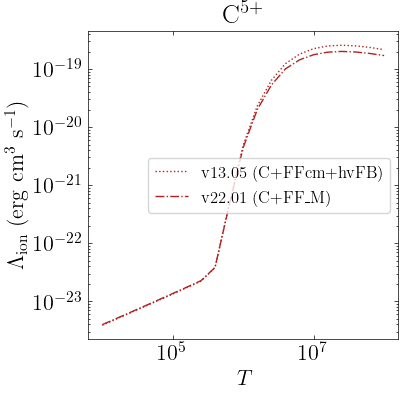

In [73]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_CVI_v1303_C+lam_CVI_v1303_FFcm+lam_CVI_v1303_hvFB, color='firebrick', linestyle=':', label='v13.05 (C+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_carb_C['CVI']+lam_dict_carb_FF_M['CVI'], color='firebrick', linestyle='-.', label=r'v22.01 (C+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{C}^{5+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

#### $\mathrm{C}^{6+}$

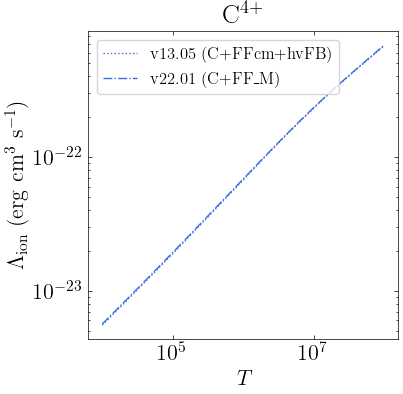

In [74]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_CVII_v1303_C+lam_CVII_v1303_FFcm+lam_CVII_v1303_hvFB, color='royalblue', linestyle=':', label='v13.05 (C+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_carb_C['CVII']+lam_dict_carb_FF_M['CVII'], color='royalblue', linestyle='-.', label=r'v22.01 (C+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{C}^{4+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

ax.legend()

# Nitrogen

In [75]:
T_grid = 10**np.arange(4, 8.2, 0.2)

In [76]:
N_list = ['NI', 'NII', 'NIII', 'NIV', 'NV', 'NVI', 'NVII', 'NVIII']

N_species = [r'$\mathrm{N}^0$', r'$\mathrm{N}^+$', r'$\mathrm{N}^{2+}$', r'$\mathrm{N}^{3+}$',
            r'$\mathrm{N}^{4+}$', r'$\mathrm{N}^{5+}$', r'$\mathrm{N}^{6+}$',
            r'$\mathrm{N}^{7+}$']

Load in cooling due to collisional ionization + free-free

In [77]:
lam_dict_nit_N = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/{}/coll t6.cool'.format(s), skiprows=1)[:,9] for s in N_list} # O cooling
lam_dict_nit_FF_M = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/{}/coll t6.cool'.format(s), skiprows=1)[:,-8] for s in N_list} # FF cooling
lam_dict_nit_Ctot = {s:np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/{}/coll t6.cool'.format(s), skiprows=1)[:,2] for s in N_list}

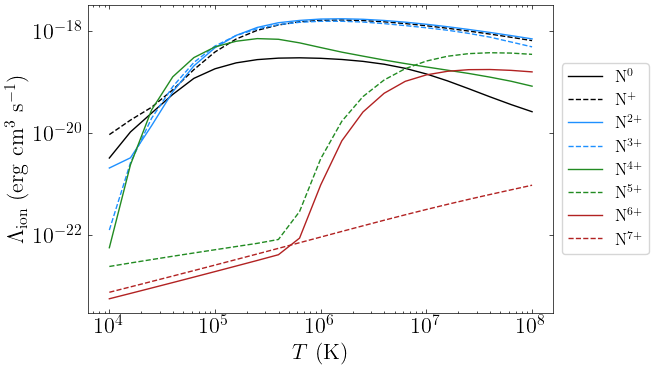

In [78]:
fig, ax = plt.subplots(1, figsize=(6,4))

for i in range(len(N_list)):
    
    s = N_list[i]
    
    
    ax.plot(T_grid, lam_dict_nit_Ctot[s], 
            color=colors_list[i], 
            linestyle = ls_list[i], label=N_species[i])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')
    
ax.set_xscale('log')
ax.set_yscale('log')
    
#ax.set_xlim(10**4,10**6.9)
#ax.set_ylim(10**-2.9, 10**0.3)

Load in cooling due to recombination

In [79]:
lam_dict_nit_rec = {s:np.zeros(len(T_grid)) for s in N_list} # Compute recombination cooling separately

# Load in the recombination file
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVIII/recomb t6.cool'.format(s)) as f:
    L = f.readlines()

# Read in lines with temperatures and recombination coefficients
te_str_list = [l for l in L if 'recombination coefficients' in l][1:] # First line is a title
rad_rec_str_list = [l for l in L if 'radiative used' in l]

# Isolate temperatures and recombination coefficients by splitting strings appropriately
te_list = [float(l.split('\t')[2]) for l in te_str_list]
rad_rec_list = [np.array(list(filter(None, l.split(' ')[-5-2*len(C_list):-4])), dtype=float) for l in rad_rec_str_list]

# Isolate unique temperatures and recombination coefficients
te_unique = []
rad_rec_unique = []

for i in range(len(te_list)-1):

    if te_list[i]!=te_list[i+1]:
        te_unique.append(te_list[i])
        rad_rec_unique.append(rad_rec_list[i])

te_unique.append(te_list[-1]) # Need to manually add last entry
rad_rec_unique.append(rad_rec_unique[-1])

te_unique = np.array(te_unique)
rad_rec_unique = np.array(rad_rec_unique)

# Compute recombination cooling, multiply kT (in erg) with recombination coefficient
for i in range(1,len(N_list)):
    s = N_list[i]
    lam_dict_nit_rec[s] = ((constants.k_B*te_unique*units.K).to(units.erg).value)*rad_rec_unique[:,i-1]

Generate total cooling

In [80]:
lam_dict_nit = {s:lam_dict_nit_Ctot[s]+lam_dict_nit_rec[s] for s in N_list}

In [81]:
with open(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/lam_nit.pkl', 'wb') as f:
    pickle.dump(lam_dict_nit, f)

Compare with GF12

In [82]:
gf12_table_nit = np.loadtxt(rootdir+'gf12_grids/table1g.dat')

In [83]:
x_list = [2e+4, 2e+4, 2e+4, 2e+4, 1e+7, 1e+7, 1e+7, 1e+7, 1e+7]
y_list = [7e-22, 1e-19, 1e-19, 9e-22, 2e-18, 1e-19, 2e-20, 4e-19]

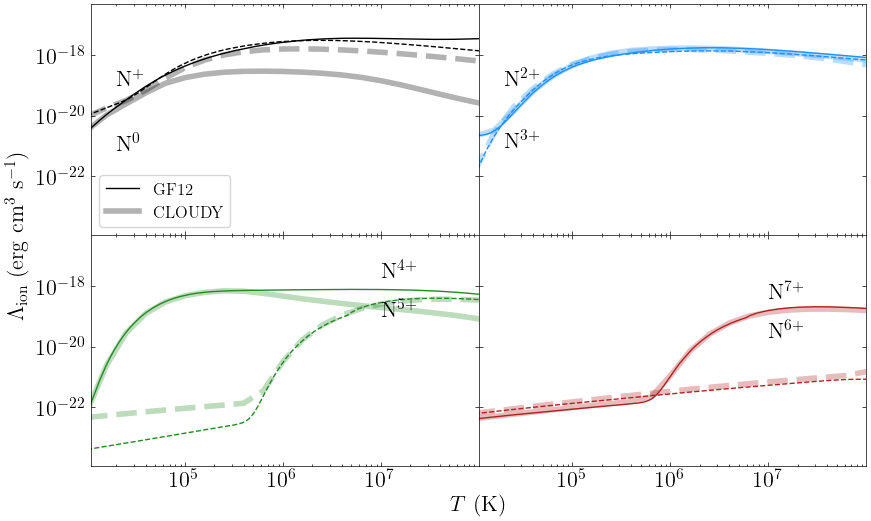

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(5*2, 3*2), sharex=True, sharey=True)

# NI and NII

axes[0,0].plot(gf12_table_nit[:,0], gf12_table_nit[:,1], 
            color=colors_list[0], 
            linestyle = ls_list[0], label='GF12')
    
axes[0,0].plot(T_grid, lam_dict_nit[N_list[0]], 
        color=colors_list[0], 
        linestyle = ls_list[0], label='CLOUDY', lw=4, alpha=.3)

axes[0,0].text(x_list[0], y_list[0], N_species[0])
    
axes[0,0].plot(gf12_table_nit[:,0], gf12_table_nit[:,2], 
            color=colors_list[1], 
            linestyle = ls_list[1])
    
axes[0,0].plot(T_grid, lam_dict_nit[N_list[1]], 
        color=colors_list[1], 
        linestyle = ls_list[1], lw=4, alpha=.3)    

axes[0,0].text(x_list[1], y_list[1], N_species[1])

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

axes[0,0].legend()

axes[0,0].set_xlim(1.1e+4, 9.9e+7)
axes[0,0].set_ylim(1.1e-24, 4.9e-17)

# NIII and NIV

axes[0,1].plot(gf12_table_nit[:,0], gf12_table_nit[:,3], 
            color=colors_list[2], 
            linestyle = ls_list[2], label='GF12')
    
axes[0,1].plot(T_grid, lam_dict_nit[N_list[2]], 
        color=colors_list[2], 
        linestyle = ls_list[2], label='CLOUDY', lw=4, alpha=.3)

axes[0,1].text(x_list[2], y_list[2], N_species[2])

    
axes[0,1].plot(gf12_table_nit[:,0], gf12_table_nit[:,4], 
            color=colors_list[3], 
            linestyle = ls_list[3])
    
axes[0,1].plot(T_grid, lam_dict_nit[N_list[3]], 
        color=colors_list[3], 
        linestyle = ls_list[3], lw=4, alpha=.3) 

axes[0,1].text(x_list[3], y_list[3], N_species[3])

#axes[0,1].legend()

# NV and NVI

axes[1,0].plot(gf12_table_nit[:,0], gf12_table_nit[:,5], 
            color=colors_list[4], 
            linestyle = ls_list[4], label=N_species[4]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_nit[N_list[4]], 
        color=colors_list[4], 
        linestyle = ls_list[4], label=N_species[4]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,0].text(x_list[4], y_list[4], N_species[4])
    
axes[1,0].plot(gf12_table_nit[:,0], gf12_table_nit[:,6], 
            color=colors_list[5], 
            linestyle = ls_list[5], label=N_species[5]+' (GF12)')
    
axes[1,0].plot(T_grid, lam_dict_nit[N_list[5]], 
        color=colors_list[5], 
        linestyle = ls_list[5], label=N_species[5]+' (CLOUDY)', lw=4, alpha=.3)    

axes[1,0].text(x_list[5], y_list[5], N_species[5])

#axes[1,0].legend()

# NVII and NVIII

axes[1,1].plot(gf12_table_nit[:,0], gf12_table_nit[:,7], 
            color=colors_list[6], 
            linestyle = ls_list[6], label=N_species[6]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_nit[N_list[6]], 
        color=colors_list[6], 
        linestyle = ls_list[6], label=N_species[6]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,1].text(x_list[6], y_list[6], N_species[6])

axes[1,1].plot(gf12_table_nit[:,0], gf12_table_nit[:,8], 
            color=colors_list[7], 
            linestyle = ls_list[7], label=N_species[7]+' (GF12)')
    
axes[1,1].plot(T_grid, lam_dict_nit[N_list[7]], 
        color=colors_list[7], 
        linestyle = ls_list[7], label=N_species[7]+' (CLOUDY)', lw=4, alpha=.3)

axes[1,1].text(x_list[7], y_list[7], N_species[7])


#axes[1,1].legend()

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

#ax_label.set_title('Without recombination (default)')

plt.subplots_adjust(wspace=0, hspace=0)

## Version control

### Version 13.03

In [85]:
T_grid_v1303 = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NIV_v1303/coll t6.cool', skiprows=1)[:,1]

In [86]:
T_grid_v1303

array([1.0000e+04, 1.5849e+04, 2.5119e+04, 3.9811e+04, 6.3096e+04,
       1.0000e+05, 1.5849e+05, 2.5119e+05, 3.9811e+05, 6.3096e+05,
       1.0000e+06, 1.5849e+06, 2.5119e+06, 3.9811e+06, 6.3096e+06,
       1.0000e+07, 1.5849e+07, 2.5119e+07, 3.9811e+07, 6.3096e+07,
       1.0000e+08])

In [87]:
lam_NIV_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NIV_v1303/coll t6.cool', skiprows=1)[:,2]
lam_NIV_v1303_N = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NIV_v1303/coll t6.cool', skiprows=1)[:,9]
lam_NIV_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NIV_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_NIV_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NIV_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_NIV_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/nitrogen_recomb_v1303.dat', skiprows=1)[:,3]

lam_NV_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NV_v1303/coll t6.cool', skiprows=1)[:,2]
lam_NV_v1303_N = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NV_v1303/coll t6.cool', skiprows=1)[:,9]
lam_NV_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NV_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_NV_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NV_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_NV_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/nitrogen_recomb_v1303.dat', skiprows=1)[:,4]

lam_NVI_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVI_v1303/coll t6.cool', skiprows=1)[:,2]
lam_NVI_v1303_N = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVI_v1303/coll t6.cool', skiprows=1)[:,9]
lam_NVI_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVI_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_NVI_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVI_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_NVI_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/nitrogen_recomb_v1303.dat', skiprows=1)[:,5]

lam_NVII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_NVII_v1303_N = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVII_v1303/coll t6.cool', skiprows=1)[:,9]
lam_NVII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_NVII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_NVII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/nitrogen_recomb_v1303.dat', skiprows=1)[:,6]

lam_NVIII_v1303_Ctot = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVIII_v1303/coll t6.cool', skiprows=1)[:,2]
lam_NVIII_v1303_N = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVIII_v1303/coll t6.cool', skiprows=1)[:,9]
lam_NVIII_v1303_FFcm = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVIII_v1303/coll t6.cool', skiprows=1)[:,-9]
lam_NVIII_v1303_hvFB = np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/NVIII_v1303/coll t6.cool', skiprows=1)[:,-8]
lam_NVIII_v1303_rec = (constants.k_B*T_grid_v1303*units.K).to(units.erg).value*np.loadtxt(rootdir+'cloudy_grids/non_eqm_models/cooling_eff/N/nitrogen_recomb_v1303.dat', skiprows=1)[:,7]

#### $\mathrm{N}^{4+}$

In [88]:
lam_NV_v1303_hvFB, lam_NV_v1303_rec

(array([1.3294e-23, 1.5402e-23, 1.7751e-23, 2.0341e-23, 2.3154e-23,
        2.6159e-23, 2.9293e-23, 3.2469e-23, 3.5563e-23, 3.8423e-23,
        4.0871e-23, 4.2725e-23, 4.3816e-23, 4.4022e-23, 4.3283e-23,
        4.1627e-23, 3.9162e-23, 3.6061e-23, 3.2537e-23, 2.8811e-23,
        2.5082e-23]),
 array([1.32956499e-23, 1.54048618e-23, 1.77564274e-23, 2.03370564e-23,
        2.31721722e-23, 2.60942661e-23, 2.93217540e-23, 3.24609688e-23,
        3.55623662e-23, 3.84170223e-23, 4.08672104e-23, 4.26697167e-23,
        4.36974580e-23, 4.40269789e-23, 4.32953744e-23, 4.16955998e-23,
        3.91686117e-23, 3.60677431e-23, 3.25392903e-23, 2.88345451e-23,
        2.51278118e-23]))

In [89]:
lam_NV_v1303_Ctot, lam_NV_v1303_N+lam_NV_v1303_FFcm+lam_NV_v1303_hvFB

(array([5.8899e-23, 2.5052e-21, 2.9647e-20, 1.3072e-19, 3.0897e-19,
        4.9482e-19, 6.2509e-19, 6.8992e-19, 7.0938e-19, 7.0104e-19,
        6.7433e-19, 6.3585e-19, 5.9093e-19, 5.4314e-19, 4.9449e-19,
        4.4610e-19, 3.9880e-19, 3.5337e-19, 3.1050e-19, 2.7073e-19,
        2.3444e-19]),
 array([5.88982000e-23, 2.50522300e-21, 2.96468798e-20, 1.30715637e-19,
        3.08969951e-19, 4.94794886e-19, 6.24500570e-19, 6.85907043e-19,
        6.96834385e-19, 6.76942690e-19, 6.39752070e-19, 5.93732891e-19,
        5.44035175e-19, 4.93529130e-19, 4.43735035e-19, 3.95533287e-19,
        3.49595282e-19, 3.06481741e-19, 2.66674197e-19, 2.30454571e-19,
        1.97955252e-19]))

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

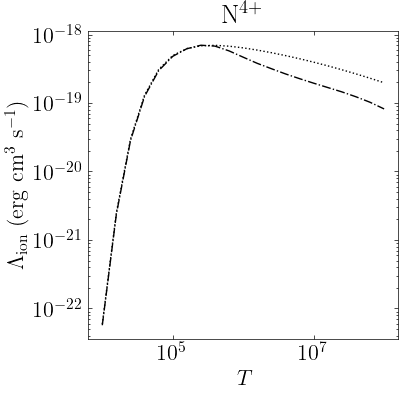

In [90]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_NV_v1303_N+lam_NV_v1303_FFcm+lam_NV_v1303_hvFB, color='black', linestyle=':', label='v13.03 (N+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_nit_N['NV']+lam_dict_nit_FF_M['NV'], color='black', linestyle='-.', label=r'v22.01 (N+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{N}^{4+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

#ax.legend()

#### $\mathrm{N}^{5+}$

In [91]:
lam_NVI_v1303_hvFB, lam_NVI_v1303_rec

(array([2.0427e-23, 2.3481e-23, 2.6799e-23, 3.0371e-23, 3.4176e-23,
        3.8180e-23, 4.2329e-23, 4.6548e-23, 5.0731e-23, 5.4741e-23,
        5.8408e-23, 6.1539e-23, 6.3925e-23, 6.5367e-23, 6.5701e-23,
        6.4826e-23, 6.2730e-23, 5.9501e-23, 5.5319e-23, 5.0435e-23,
        4.5133e-23]),
 array([2.04336052e-23, 2.34136394e-23, 2.68080437e-23, 3.03956546e-23,
        3.41484643e-23, 3.82439773e-23, 4.22320786e-23, 4.64718998e-23,
        5.07327110e-23, 5.47072336e-23, 5.84014527e-23, 6.14881559e-23,
        6.38121609e-23, 6.54083706e-23, 6.56835257e-23, 6.48905030e-23,
        6.28010702e-23, 5.96504982e-23, 5.55146675e-23, 5.04386756e-23,
        4.51472223e-23]))

In [92]:
lam_NVI_v1303_Ctot, lam_NVI_v1303_N+lam_NVI_v1303_FFcm+lam_NVI_v1303_hvFB

(array([2.4304e-23, 2.8438e-23, 3.3144e-23, 3.8498e-23, 4.4589e-23,
        5.1527e-23, 5.9546e-23, 6.8777e-23, 8.1969e-23, 3.0647e-22,
        3.6146e-21, 2.0915e-20, 6.5911e-20, 1.4033e-19, 2.3110e-19,
        3.1895e-19, 3.8715e-19, 4.2672e-19, 4.3733e-19, 4.2475e-19,
        3.9697e-19]),
 array([2.43042000e-23, 2.84379000e-23, 3.31439000e-23, 3.84980000e-23,
        4.45890000e-23, 5.15280000e-23, 5.95450000e-23, 6.87761350e-23,
        8.19687000e-23, 3.06461000e-22, 3.61455800e-21, 2.09150940e-20,
        6.59110680e-20, 1.40326427e-19, 2.31103661e-19, 3.18945276e-19,
        3.87153050e-19, 4.26717721e-19, 4.37321349e-19, 4.24746755e-19,
        3.96967553e-19]))

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

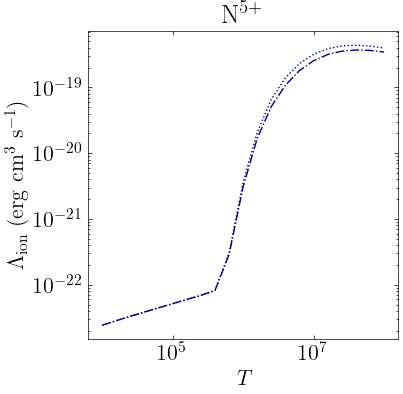

In [93]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_NVI_v1303_N+lam_NVI_v1303_FFcm+lam_NVI_v1303_hvFB, color='navy', linestyle=':', label='v13.03 (N+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_nit_N['NVI']+lam_dict_nit_FF_M['NVI'], color='navy', linestyle='-.', label=r'v22.01 (N+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{N}^{5+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

#ax.legend()

#### $\mathrm{N}^{6+}$

In [94]:
lam_NVII_v1303_hvFB, lam_NVII_v1303_rec

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([3.49304197e-23, 4.11379833e-23, 4.82059259e-23, 5.60643177e-23,
        6.53350720e-23, 7.53834354e-23, 8.64335287e-23, 9.84926831e-23,
        1.11578985e-22, 1.24572204e-22, 1.39445549e-22, 1.52735704e-22,
        1.66119701e-22, 1.78086656e-22, 1.88165007e-22, 1.94671509e-22,
        1.98031249e-22, 1.96985366e-22, 1.91278260e-22, 1.82067067e-22,
        1.69819827e-22]))

In [95]:
lam_NVII_v1303_Ctot, lam_NVII_v1303_N+lam_NVII_v1303_FFcm+lam_NVII_v1303_hvFB

(array([5.5724e-24, 7.1021e-24, 9.0656e-24, 1.1586e-23, 1.4816e-23,
        1.8952e-23, 2.4393e-23, 3.1436e-23, 4.0732e-23, 8.7543e-23,
        1.0246e-21, 7.9866e-21, 3.0960e-20, 7.4750e-20, 1.3076e-19,
        1.7787e-19, 2.1065e-19, 2.2642e-19, 2.2726e-19, 2.1748e-19,
        2.0153e-19]),
 array([5.52840000e-24, 7.05860000e-24, 9.02280000e-24, 1.15440000e-23,
        1.47750000e-23, 1.89120000e-23, 2.43550000e-23, 3.13990463e-23,
        4.06977300e-23, 8.75110000e-23, 1.02454400e-21, 7.98652700e-21,
        3.09592300e-20, 7.47499800e-20, 1.30763400e-19, 1.77871570e-19,
        2.10651010e-19, 2.26422440e-19, 2.27258160e-19, 2.17481610e-19,
        2.01527500e-19]))

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

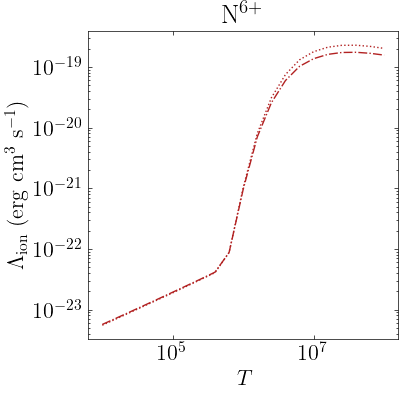

In [96]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_NVII_v1303_N+lam_NVII_v1303_FFcm+lam_NVII_v1303_hvFB, color='firebrick', linestyle=':', label='v13.03 (N+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_nit_N['NVII']+lam_dict_nit_FF_M['NVII'], color='firebrick', linestyle='-.', label=r'v22.01 (N+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{N}^{6+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

#ax.legend()

#### $\mathrm{N}^{7+}$

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

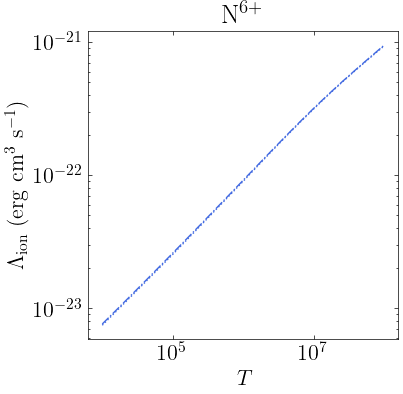

In [97]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(T_grid_v1303, lam_NVIII_v1303_N+lam_NVIII_v1303_FFcm+lam_NVII_v1303_hvFB, color='royalblue', linestyle=':', label='v13.03 (N+FFcm+hvFB)')
ax.plot(T_grid, lam_dict_nit_N['NVIII']+lam_dict_nit_FF_M['NVIII'], color='royalblue', linestyle='-.', label=r'v22.01 (N+FF_M)')

#ax.plot(T_grid_v1305, , color='black', linestyle=':', label='v13.05')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r'$\mathrm{N}^{6+}$')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$')

#ax.legend()

# CNO

## Ctot

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

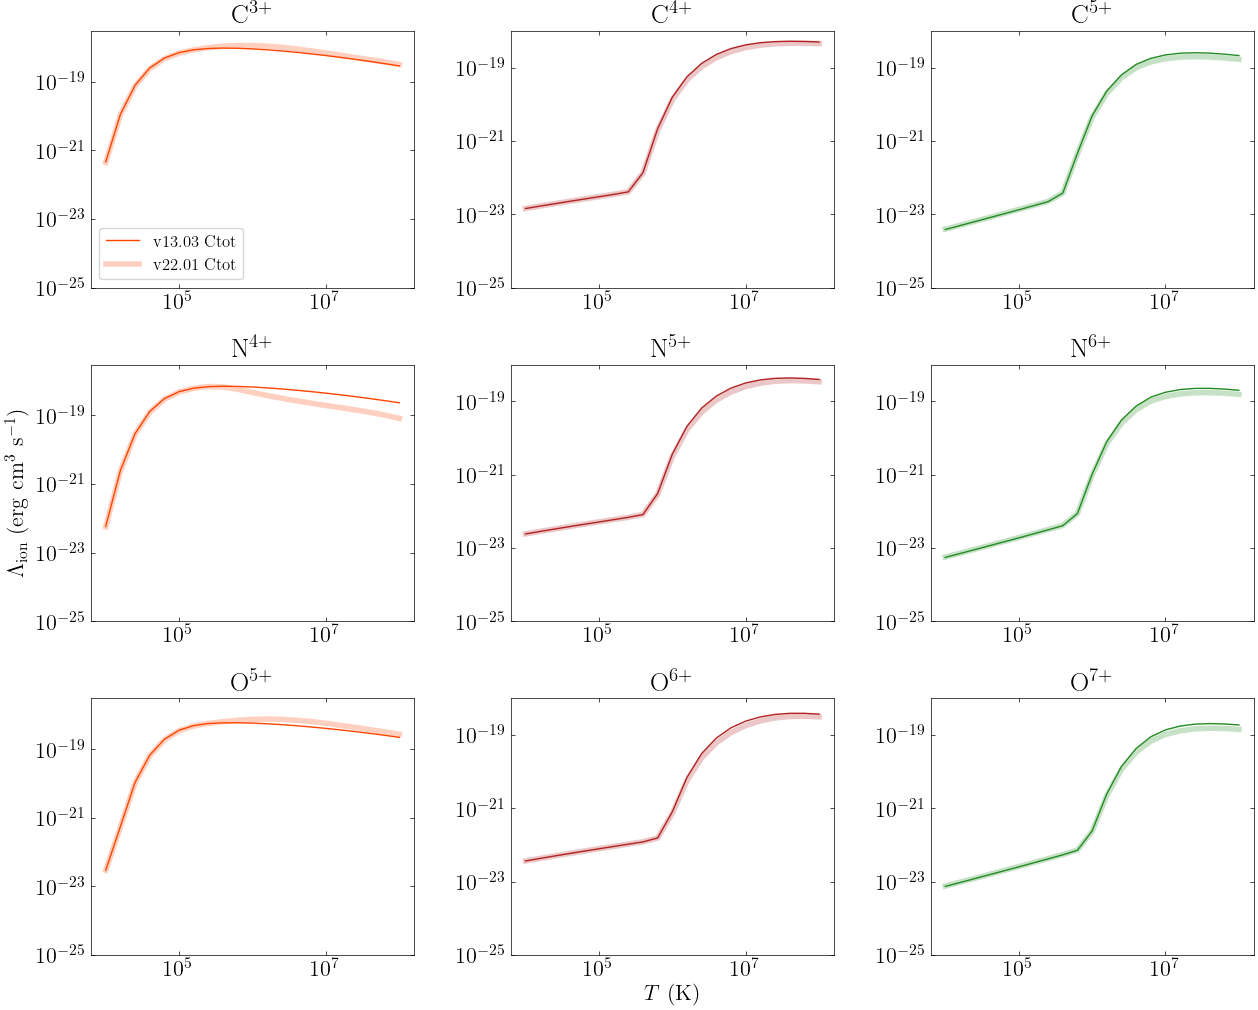

In [98]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 4*3))

# Lowest ions

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_Ctot, color='orangered', label='v13.03 Ctot')
axes[0,0].plot(T_grid, lam_dict_carb_Ctot['CIV'], color='orangered', lw=4, alpha=.25, label='v22.01 Ctot')

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_Ctot, color='orangered', label='v13.03 O')
axes[1,0].plot(T_grid, lam_dict_nit_Ctot['NV'], color='orangered', lw=4, alpha=.25,  label='v22.01 O')

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_Ctot, color='orangered', label='v13.03 O')
axes[2,0].plot(T_grid, lam_dict_oxy_Ctot['OVI'], color='orangered', lw=4, alpha=.25, label='v22.01 O')

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_Ctot, color='firebrick', label='v13.03')
axes[0,1].plot(T_grid, lam_dict_carb_Ctot['CV'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_Ctot, color='firebrick', label='v13.03')
axes[1,1].plot(T_grid, lam_dict_nit_Ctot['NVI'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_Ctot, color='firebrick', label='v13.03')
axes[2,1].plot(T_grid, lam_dict_oxy_Ctot['OVII'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_Ctot, color='forestgreen', label='v13.03')
axes[0,2].plot(T_grid, lam_dict_carb_Ctot['CVI'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_Ctot, color='forestgreen', label='v13.03')
axes[1,2].plot(T_grid, lam_dict_nit_Ctot['NVII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_Ctot, color='forestgreen', label='v13.03')
axes[2,2].plot(T_grid, lam_dict_oxy_Ctot['OVIII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# Full panel

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

## CNO cooling

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

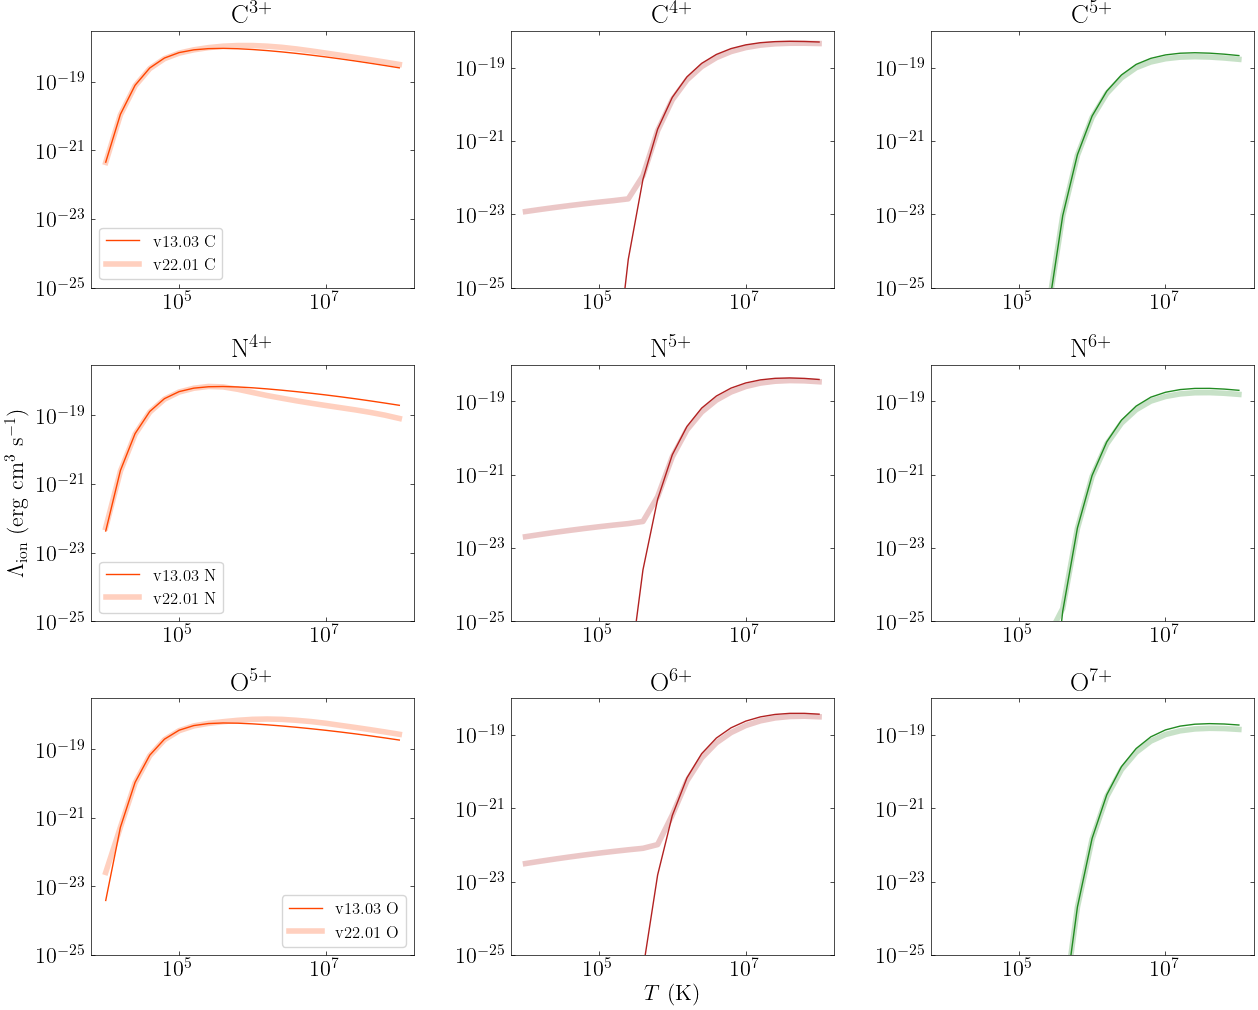

In [99]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 4*3))

# Lowest ions

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_C, color='orangered', label='v13.03 C')
axes[0,0].plot(T_grid, lam_dict_carb_C['CIV'], color='orangered', lw=4, alpha=0.25, label='v22.01 C')

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_N, color='orangered', label='v13.03 N')
axes[1,0].plot(T_grid, lam_dict_nit_N['NV'], color='orangered', lw=4, alpha=0.25, label='v22.01 N')

axes[1,0].legend()

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_O, color='orangered', label='v13.03 O')
axes[2,0].plot(T_grid, lam_dict_oxy_O['OVI'], color='orangered', lw=4, alpha=0.25, label='v22.01 O')

axes[2,0].legend()

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_C, color='firebrick', label='v13.03')
axes[0,1].plot(T_grid, lam_dict_carb_C['CV'], color='firebrick', lw=4, alpha=0.25, label='v22.01')

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_N, color='firebrick', label='v13.03')
axes[1,1].plot(T_grid, lam_dict_nit_N['NVI'], color='firebrick', lw=4, alpha=0.25, label='v22.01')

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_O, color='firebrick', label='v13.03')
axes[2,1].plot(T_grid, lam_dict_oxy_O['OVII'], color='firebrick', lw=4, alpha=0.25, label='v22.01')

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_C, color='forestgreen', label='v13.03')
axes[0,2].plot(T_grid, lam_dict_carb_C['CVI'], color='forestgreen', lw=4, alpha=0.25, label='v22.01')

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_N, color='forestgreen', label='v13.03')
axes[1,2].plot(T_grid, lam_dict_nit_N['NVII'], color='forestgreen', lw=4, alpha=0.25, label='v22.01')

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_O, color='forestgreen', label='v13.03')
axes[2,2].plot(T_grid, lam_dict_oxy_O['OVIII'], color='forestgreen', lw=4, alpha=0.25, label='v22.01')

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# Full panel

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

## FF

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

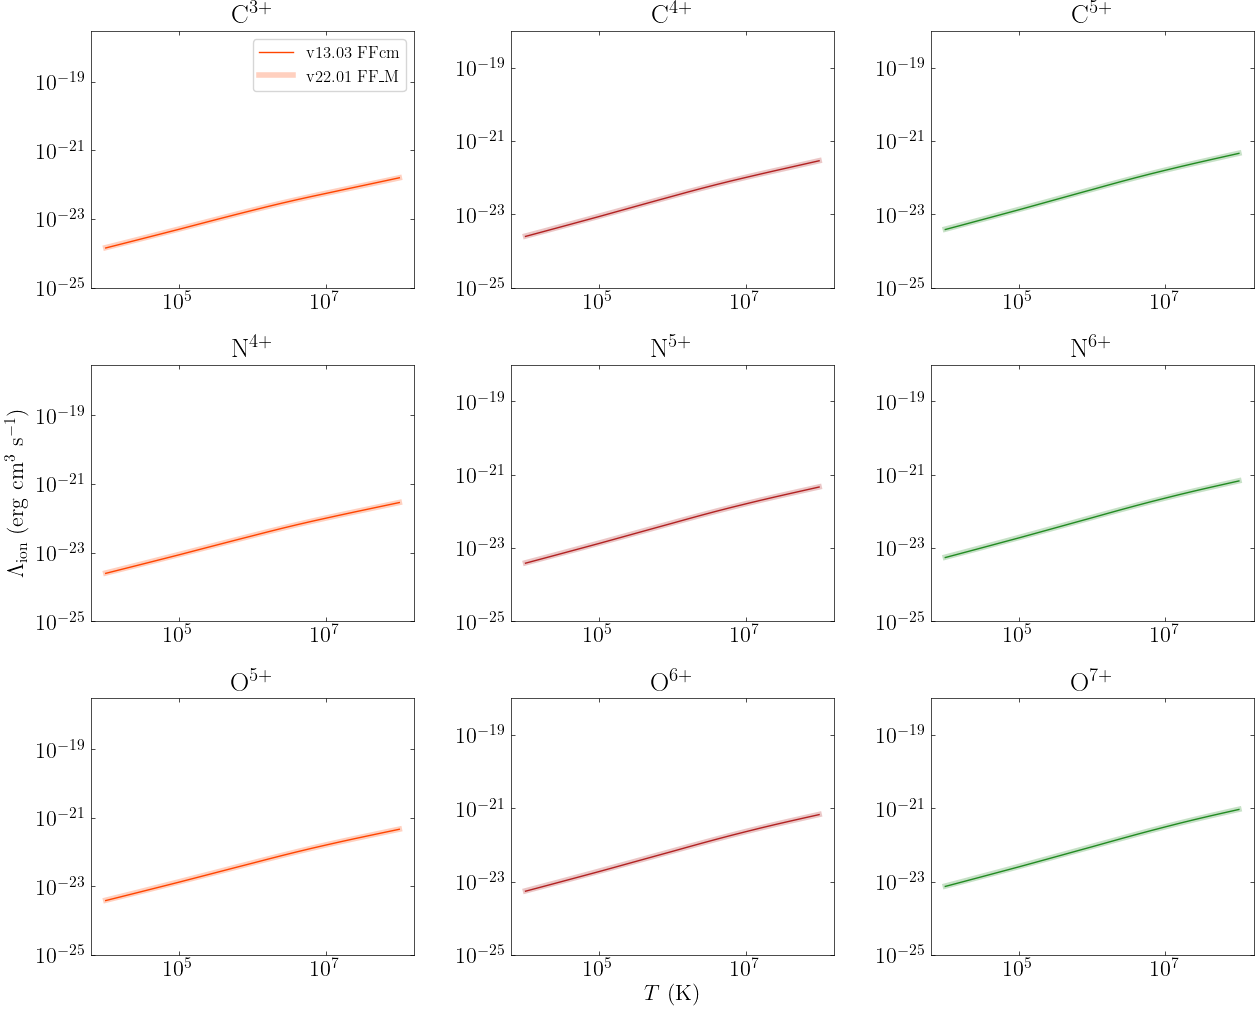

In [100]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 4*3))

# Lowest ions

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_FFcm, color='orangered', label='v13.03 FFcm')
axes[0,0].plot(T_grid, lam_dict_carb_FF_M['CIV'], color='orangered', lw=4, alpha=.25, label='v22.01 FF_M')

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_FFcm, color='orangered', label='v13.03 O')
axes[1,0].plot(T_grid, lam_dict_nit_FF_M['NV'], color='orangered', lw=4, alpha=.25, label='v22.01 O')

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_FFcm, color='orangered', label='v13.03 O')
axes[2,0].plot(T_grid, lam_dict_oxy_FF_M['OVI'], color='orangered', lw=4, alpha=.25, label='v22.01 O')

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_FFcm, color='firebrick', label='v13.03')
axes[0,1].plot(T_grid, lam_dict_carb_FF_M['CV'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_FFcm, color='firebrick', label='v13.03')
axes[1,1].plot(T_grid, lam_dict_nit_FF_M['NVI'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_FFcm, color='firebrick', label='v13.03')
axes[2,1].plot(T_grid, lam_dict_oxy_FF_M['OVII'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_FFcm, color='forestgreen', label='v13.03')
axes[0,2].plot(T_grid, lam_dict_carb_FF_M['CVI'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_FFcm, color='forestgreen', label='v13.03')
axes[1,2].plot(T_grid, lam_dict_nit_FF_M['NVII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_FFcm, color='forestgreen', label='v13.03')
axes[2,2].plot(T_grid, lam_dict_oxy_FF_M['OVIII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# Full panel

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

## FB

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

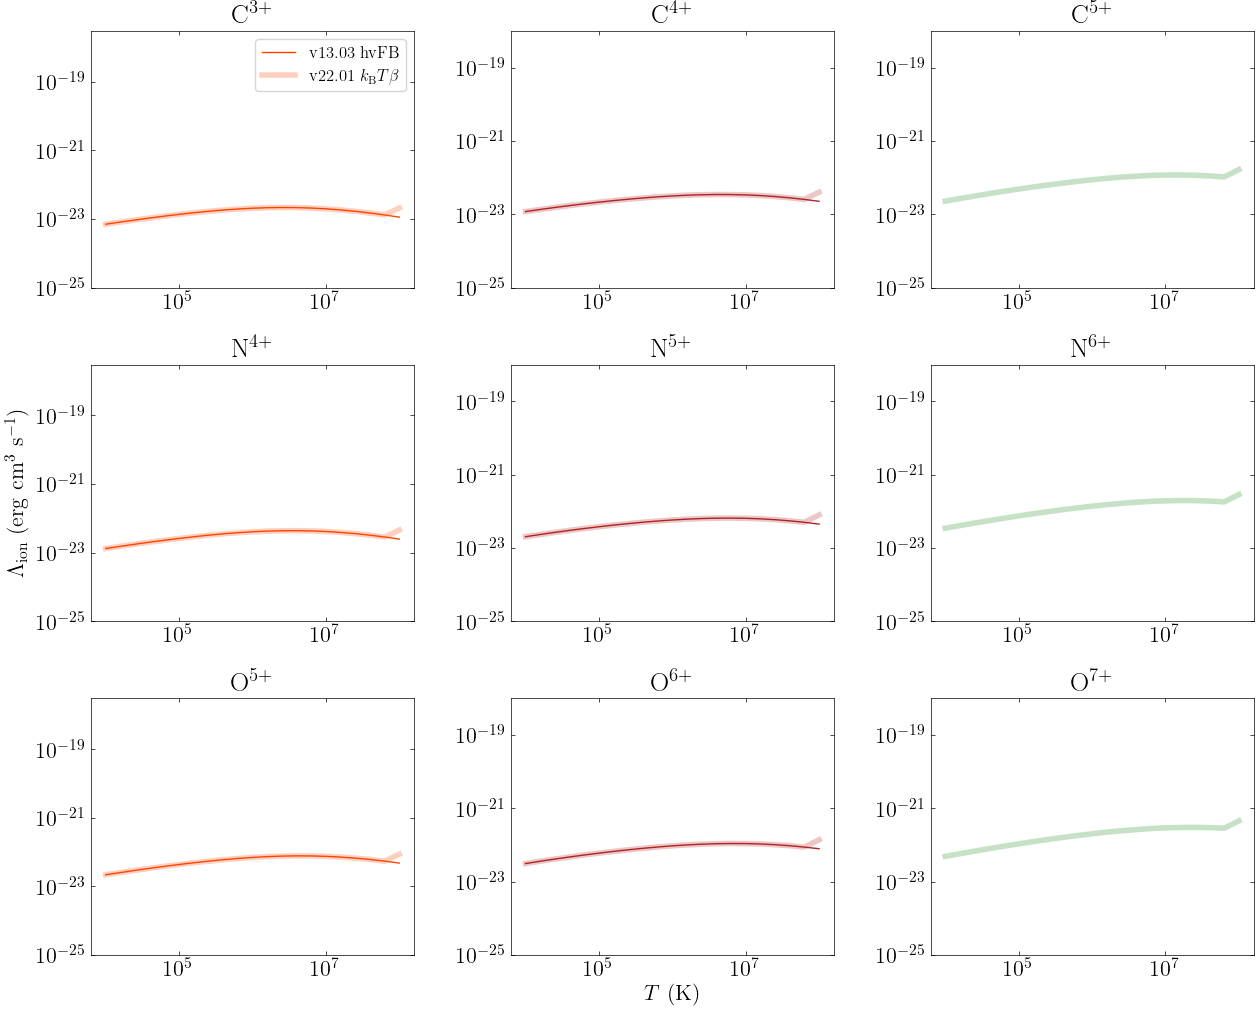

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 4*3))

# Lowest ions

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_hvFB, color='orangered', label='v13.03 hvFB')
axes[0,0].plot(T_grid, lam_dict_carb_rec['CIV'], color='orangered', lw=4, alpha=.25, label=r'v22.01 $k_\mathrm{B} T \beta$')

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_hvFB, color='orangered', label='v13.03 O')
axes[1,0].plot(T_grid, lam_dict_nit_rec['NV'], color='orangered', lw=4, alpha=.25, label='v22.01 O')

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_hvFB, color='orangered', label='v13.03 O')
axes[2,0].plot(T_grid, lam_dict_oxy_rec['OVI'], color='orangered', lw=4, alpha=.25, label='v22.01 O')

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_hvFB, color='firebrick', label='v13.03')
axes[0,1].plot(T_grid, lam_dict_carb_rec['CV'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_hvFB, color='firebrick', label='v13.03')
axes[1,1].plot(T_grid, lam_dict_nit_rec['NVI'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_hvFB, color='firebrick', label='v13.03')
axes[2,1].plot(T_grid, lam_dict_oxy_rec['OVII'], color='firebrick', lw=4, alpha=.25, label='v22.01')

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_hvFB, color='forestgreen', label='v13.03')
axes[0,2].plot(T_grid, lam_dict_carb_rec['CVI'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_hvFB, color='forestgreen', label='v13.03')
axes[1,2].plot(T_grid, lam_dict_nit_rec['NVII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_hvFB, color='forestgreen', label='v13.03')
axes[2,2].plot(T_grid, lam_dict_oxy_rec['OVIII'], color='forestgreen', lw=4, alpha=.25, label='v22.01')

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# Full panel

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

## Ctot, CNO, FF, FB

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

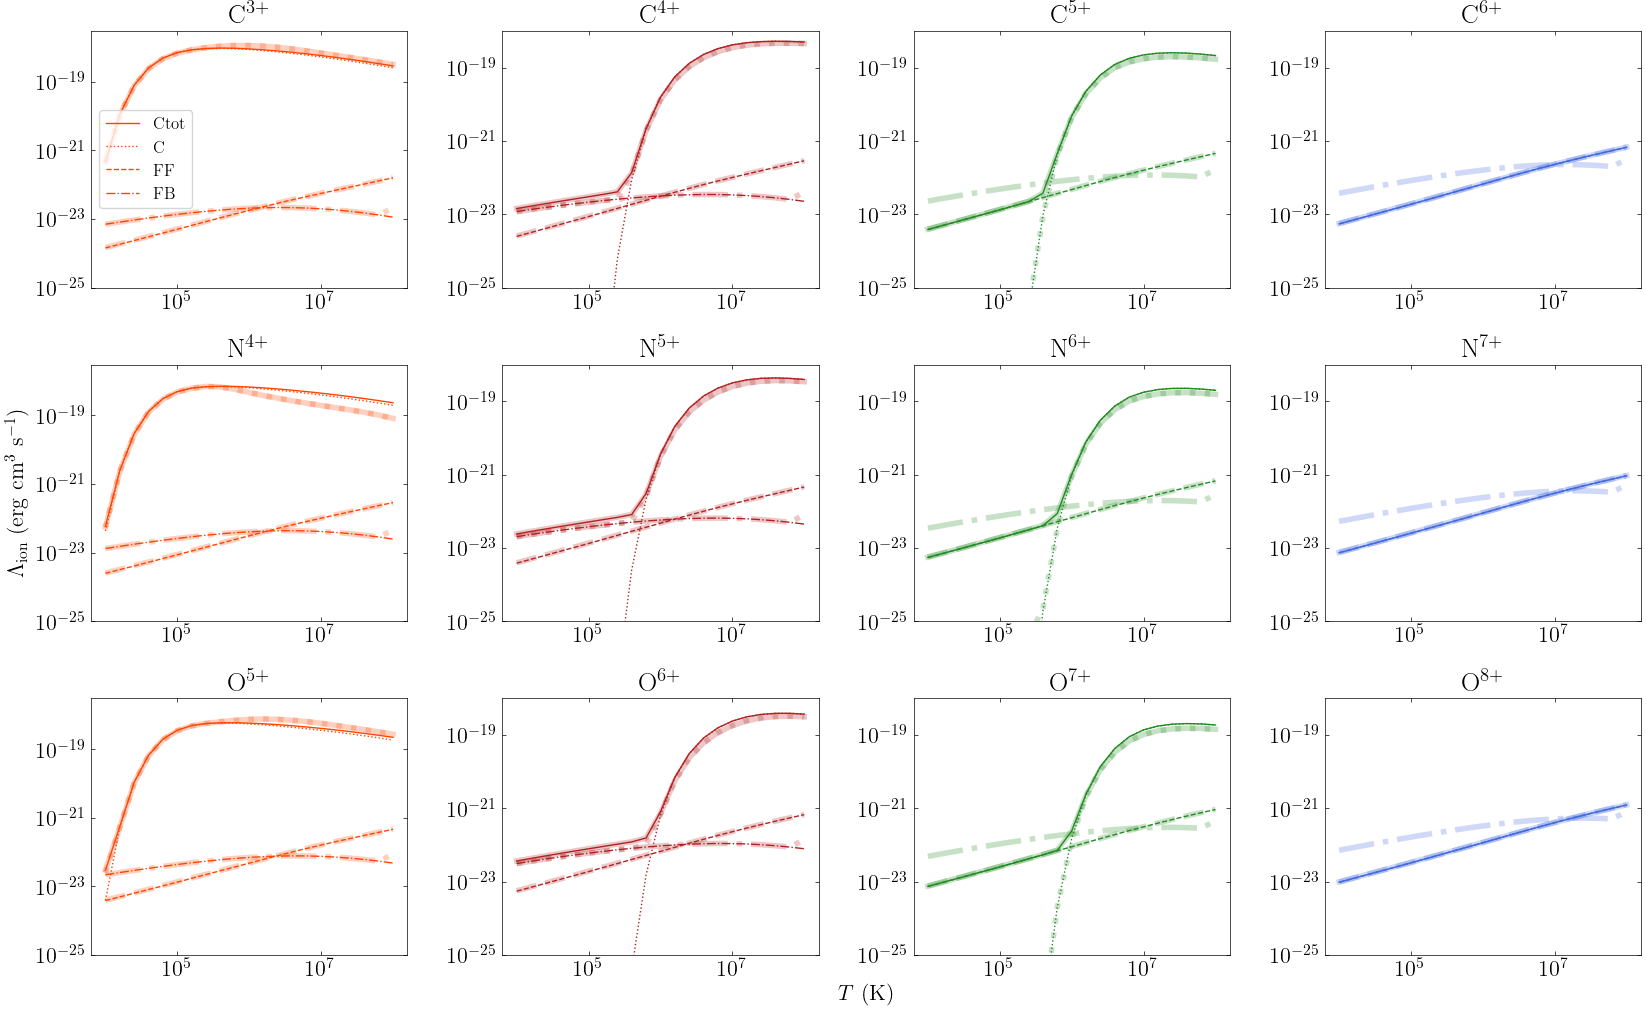

In [120]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 4*3))

# Lowest ions

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_Ctot, color='orangered', label='Ctot')
axes[0,0].plot(T_grid, lam_dict_carb_Ctot['CIV'], color='orangered', lw=4, alpha=.25)

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_C, color='orangered', linestyle=':', label='C')
axes[0,0].plot(T_grid, lam_dict_carb_C['CIV'], color='orangered', linestyle=':', lw=4, alpha=0.25)

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_FFcm, color='orangered', linestyle='--', label='FF')
axes[0,0].plot(T_grid, lam_dict_carb_FF_M['CIV'], color='orangered', linestyle='--', lw=4, alpha=.25)

axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_hvFB, color='orangered', linestyle='-.', label='FB')
axes[0,0].plot(T_grid, lam_dict_carb_rec['CIV'], color='orangered', linestyle='-.', lw=4, alpha=.25)

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_Ctot, color='orangered')
axes[1,0].plot(T_grid, lam_dict_nit_Ctot['NV'], color='orangered', lw=4, alpha=.25)

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_N, color='orangered', linestyle=':')
axes[1,0].plot(T_grid, lam_dict_nit_N['NV'], color='orangered', linestyle=':', lw=4, alpha=0.25)

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_FFcm, color='orangered', linestyle='--')
axes[1,0].plot(T_grid, lam_dict_nit_FF_M['NV'], color='orangered', linestyle='--', lw=4, alpha=.25)

axes[1,0].plot(T_grid_v1303, lam_NV_v1303_hvFB, color='orangered', linestyle='-.')
axes[1,0].plot(T_grid, lam_dict_nit_rec['NV'], color='orangered', linestyle='-.', lw=4, alpha=.25)

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_Ctot, color='orangered')
axes[2,0].plot(T_grid, lam_dict_oxy_Ctot['OVI'], color='orangered', lw=4, alpha=.25)

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_O, color='orangered', linestyle=':')
axes[2,0].plot(T_grid, lam_dict_oxy_O['OVI'], color='orangered', linestyle=':', lw=4, alpha=0.25)

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_FFcm, color='orangered', linestyle='--')
axes[2,0].plot(T_grid, lam_dict_oxy_FF_M['OVI'], color='orangered', linestyle='--', lw=4, alpha=.25)

axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_hvFB, color='orangered', linestyle='-.')
axes[2,0].plot(T_grid, lam_dict_oxy_rec['OVI'], color='orangered', linestyle='-.', lw=4, alpha=.25)

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_Ctot, color='firebrick')
axes[0,1].plot(T_grid, lam_dict_carb_Ctot['CV'], color='firebrick', lw=4, alpha=.25)

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_C, color='firebrick', linestyle=':')
axes[0,1].plot(T_grid, lam_dict_carb_C['CV'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_FFcm, color='firebrick', linestyle='--')
axes[0,1].plot(T_grid, lam_dict_carb_FF_M['CV'], color='firebrick', linestyle='--', lw=4, alpha=.25)

axes[0,1].plot(T_grid_v1303, lam_CV_v1303_hvFB, color='firebrick', linestyle='-.')
axes[0,1].plot(T_grid, lam_dict_carb_rec['CV'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_Ctot, color='firebrick')
axes[1,1].plot(T_grid, lam_dict_nit_Ctot['NVI'], color='firebrick', lw=4, alpha=.25)

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_N, color='firebrick', linestyle=':')
axes[1,1].plot(T_grid, lam_dict_nit_N['NVI'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_FFcm, color='firebrick', linestyle='--')
axes[1,1].plot(T_grid, lam_dict_nit_FF_M['NVI'], color='firebrick', linestyle='--', lw=4, alpha=.25)

axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_hvFB, color='firebrick', linestyle='-.')
axes[1,1].plot(T_grid, lam_dict_nit_rec['NVI'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_Ctot, color='firebrick')
axes[2,1].plot(T_grid, lam_dict_oxy_Ctot['OVII'], color='firebrick', lw=4, alpha=.25)

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_O, color='firebrick', linestyle=':')
axes[2,1].plot(T_grid, lam_dict_oxy_O['OVII'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_FFcm, color='firebrick', linestyle='--')
axes[2,1].plot(T_grid, lam_dict_oxy_FF_M['OVII'], color='firebrick', linestyle='--', lw=4, alpha=.25)

axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_hvFB, color='firebrick', linestyle='-.')
axes[2,1].plot(T_grid, lam_dict_oxy_rec['OVII'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_Ctot, color='forestgreen')
axes[0,2].plot(T_grid, lam_dict_carb_Ctot['CVI'], color='forestgreen', lw=4, alpha=.25)

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_C, color='forestgreen', linestyle=':')
axes[0,2].plot(T_grid, lam_dict_carb_C['CVI'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_FFcm, color='forestgreen', linestyle='--')
axes[0,2].plot(T_grid, lam_dict_carb_FF_M['CVI'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[0,2].plot(T_grid, lam_dict_carb_rec['CVI'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_Ctot, color='forestgreen')
axes[1,2].plot(T_grid, lam_dict_nit_Ctot['NVII'], color='forestgreen', lw=4, alpha=.25)

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_N, color='forestgreen', linestyle=':')
axes[1,2].plot(T_grid, lam_dict_nit_N['NVII'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_FFcm, color='forestgreen', linestyle='--')
axes[1,2].plot(T_grid, lam_dict_nit_FF_M['NVII'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[1,2].plot(T_grid, lam_dict_nit_rec['NVII'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_Ctot, color='forestgreen')
axes[2,2].plot(T_grid, lam_dict_oxy_Ctot['OVIII'], color='forestgreen', lw=4, alpha=.25)

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_O, color='forestgreen', linestyle=':')
axes[2,2].plot(T_grid, lam_dict_oxy_O['OVIII'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_FFcm, color='forestgreen', linestyle='--')
axes[2,2].plot(T_grid, lam_dict_oxy_FF_M['OVIII'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[2,2].plot(T_grid, lam_dict_oxy_rec['OVIII'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# e-Free ions

axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_Ctot, color='royalblue')
axes[0,3].plot(T_grid, lam_dict_carb_Ctot['CVII'], color='royalblue', lw=4, alpha=.25)

axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_C, color='royalblue', linestyle=':')
axes[0,2].plot(T_grid, lam_dict_carb_C['CVII'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_FFcm, color='royalblue', linestyle='--')
axes[0,3].plot(T_grid, lam_dict_carb_FF_M['CVII'], color='royalblue', linestyle='--', lw=4, alpha=.25)

axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_hvFB, color='royalblue', linestyle='-.')
axes[0,3].plot(T_grid, lam_dict_carb_rec['CVII'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_ylim(1e-25, 1e-18)
axes[0,3].set_title(r'$\mathrm{C}^{6+}$')

axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_Ctot, color='royalblue')
axes[1,3].plot(T_grid, lam_dict_nit_Ctot['NVIII'], color='royalblue', lw=4, alpha=.25)

axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_N, color='royalblue', linestyle=':')
axes[1,3].plot(T_grid, lam_dict_nit_N['NVIII'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_FFcm, color='royalblue', linestyle='--')
axes[1,3].plot(T_grid, lam_dict_nit_FF_M['NVIII'], color='royalblue', linestyle='--', lw=4, alpha=.25)

axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_hvFB, color='royalblue', linestyle='-.')
axes[1,3].plot(T_grid, lam_dict_nit_rec['NVIII'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[1,3].set_xscale('log')
axes[1,3].set_yscale('log')
axes[1,3].set_ylim(1e-25, 1e-18)
axes[1,3].set_title(r'$\mathrm{N}^{7+}$')

axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_Ctot, color='royalblue')
axes[2,3].plot(T_grid, lam_dict_oxy_Ctot['OIX'], color='royalblue', lw=4, alpha=.25)

axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_O, color='royalblue', linestyle=':')
axes[2,3].plot(T_grid, lam_dict_oxy_O['OIX'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_FFcm, color='royalblue', linestyle='--')
axes[2,3].plot(T_grid, lam_dict_oxy_FF_M['OIX'], color='royalblue', linestyle='--', lw=4, alpha=.25)

axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_hvFB, color='royalblue', linestyle='-.')
axes[2,3].plot(T_grid, lam_dict_oxy_rec['OIX'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[2,3].set_xscale('log')
axes[2,3].set_yscale('log')
axes[2,3].set_ylim(1e-25, 1e-18)
axes[2,3].set_title(r'$\mathrm{O}^{8+}$')

# Full panel

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)

Text(0, 0.5, '$\\Lambda_{\\mathrm{ion}} \\ (\\mathrm{erg} \\ \\mathrm{cm}^{3} \\ \\mathrm{s}^{-1})$')

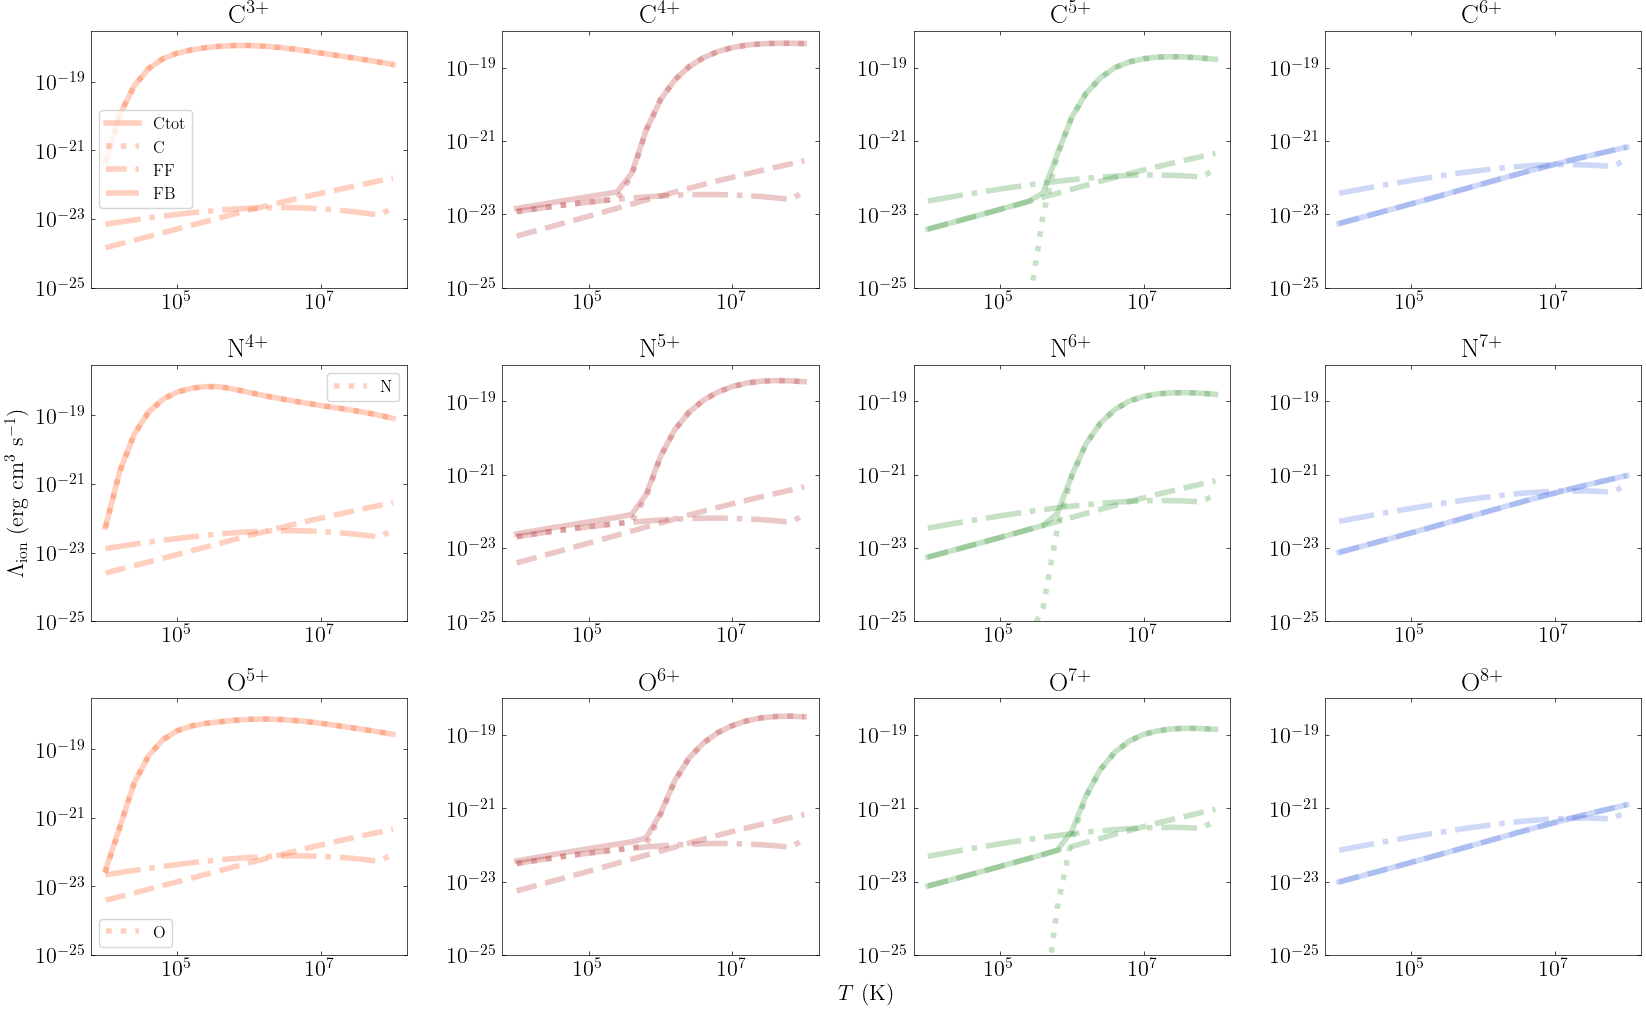

In [129]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 4*3))

# Lowest ions

#axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_Ctot, color='orangered', label='Ctot')
axes[0,0].plot(T_grid, lam_dict_carb_Ctot['CIV'], color='orangered', lw=4, alpha=.25, label='Ctot')

axes[0,0].tick_params(axis='x', which='minor', bottom=True)


#axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_C, color='orangered', linestyle=':', label='C')
axes[0,0].plot(T_grid, lam_dict_carb_C['CIV'], color='orangered', linestyle=':', lw=4, alpha=0.25, label='C')

#axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_FFcm, color='orangered', linestyle='--', label='FF')
axes[0,0].plot(T_grid, lam_dict_carb_FF_M['CIV'], color='orangered', linestyle='--', lw=4, alpha=.25, label='FF')

#axes[0,0].plot(T_grid_v1303, lam_CIV_v1303_hvFB, color='orangered', linestyle='-.', label='FB')
axes[0,0].plot(T_grid, lam_dict_carb_rec['CIV'], color='orangered', linestyle='-.', lw=4, alpha=.25, label='FB')

axes[0,0].legend()

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_ylim(1e-25, 3e-18)
axes[0,0].set_title(r'$\mathrm{C}^{3+}$')

#axes[1,0].plot(T_grid_v1303, lam_NV_v1303_Ctot, color='orangered')
axes[1,0].plot(T_grid, lam_dict_nit_Ctot['NV'], color='orangered', lw=4, alpha=.25)

#axes[1,0].plot(T_grid_v1303, lam_NV_v1303_N, color='orangered', linestyle=':')
axes[1,0].plot(T_grid, lam_dict_nit_N['NV'], color='orangered', linestyle=':', lw=4, alpha=0.25, label='N')

#axes[1,0].plot(T_grid_v1303, lam_NV_v1303_FFcm, color='orangered', linestyle='--')
axes[1,0].plot(T_grid, lam_dict_nit_FF_M['NV'], color='orangered', linestyle='--', lw=4, alpha=.25)

#axes[1,0].plot(T_grid_v1303, lam_NV_v1303_hvFB, color='orangered', linestyle='-.')
axes[1,0].plot(T_grid, lam_dict_nit_rec['NV'], color='orangered', linestyle='-.', lw=4, alpha=.25)

axes[1,0].legend()

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(1e-25, 3e-18)
axes[1,0].set_title(r'$\mathrm{N}^{4+}$')

#axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_Ctot, color='orangered')
axes[2,0].plot(T_grid, lam_dict_oxy_Ctot['OVI'], color='orangered', lw=4, alpha=.25)

#axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_O, color='orangered', linestyle=':')
axes[2,0].plot(T_grid, lam_dict_oxy_O['OVI'], color='orangered', linestyle=':', lw=4, alpha=0.25, label='O')

#axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_FFcm, color='orangered', linestyle='--')
axes[2,0].plot(T_grid, lam_dict_oxy_FF_M['OVI'], color='orangered', linestyle='--', lw=4, alpha=.25)

#axes[2,0].plot(T_grid_v1303, lam_OVI_v1303_hvFB, color='orangered', linestyle='-.')
axes[2,0].plot(T_grid, lam_dict_oxy_rec['OVI'], color='orangered', linestyle='-.', lw=4, alpha=.25)

axes[2,0].legend()

axes[2,0].set_xscale('log')
axes[2,0].set_yscale('log')
axes[2,0].set_ylim(1e-25, 3e-18)
axes[2,0].set_title(r'$\mathrm{O}^{5+}$')

# Intermediate ions

#axes[0,1].plot(T_grid_v1303, lam_CV_v1303_Ctot, color='firebrick')
axes[0,1].plot(T_grid, lam_dict_carb_Ctot['CV'], color='firebrick', lw=4, alpha=.25)

#axes[0,1].plot(T_grid_v1303, lam_CV_v1303_C, color='firebrick', linestyle=':')
axes[0,1].plot(T_grid, lam_dict_carb_C['CV'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

#axes[0,1].plot(T_grid_v1303, lam_CV_v1303_FFcm, color='firebrick', linestyle='--')
axes[0,1].plot(T_grid, lam_dict_carb_FF_M['CV'], color='firebrick', linestyle='--', lw=4, alpha=.25)

#axes[0,1].plot(T_grid_v1303, lam_CV_v1303_hvFB, color='firebrick', linestyle='-.')
axes[0,1].plot(T_grid, lam_dict_carb_rec['CV'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_ylim(1e-25, 1e-18)
axes[0,1].set_title(r'$\mathrm{C}^{4+}$')

#axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_Ctot, color='firebrick')
axes[1,1].plot(T_grid, lam_dict_nit_Ctot['NVI'], color='firebrick', lw=4, alpha=.25)

#axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_N, color='firebrick', linestyle=':')
axes[1,1].plot(T_grid, lam_dict_nit_N['NVI'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

#axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_FFcm, color='firebrick', linestyle='--')
axes[1,1].plot(T_grid, lam_dict_nit_FF_M['NVI'], color='firebrick', linestyle='--', lw=4, alpha=.25)

#axes[1,1].plot(T_grid_v1303, lam_NVI_v1303_hvFB, color='firebrick', linestyle='-.')
axes[1,1].plot(T_grid, lam_dict_nit_rec['NVI'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(1e-25, 1e-18)
axes[1,1].set_title(r'$\mathrm{N}^{5+}$')

#axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_Ctot, color='firebrick')
axes[2,1].plot(T_grid, lam_dict_oxy_Ctot['OVII'], color='firebrick', lw=4, alpha=.25)

#axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_O, color='firebrick', linestyle=':')
axes[2,1].plot(T_grid, lam_dict_oxy_O['OVII'], color='firebrick', linestyle=':', lw=4, alpha=0.25)

#axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_FFcm, color='firebrick', linestyle='--')
axes[2,1].plot(T_grid, lam_dict_oxy_FF_M['OVII'], color='firebrick', linestyle='--', lw=4, alpha=.25)

#axes[2,1].plot(T_grid_v1303, lam_OVII_v1303_hvFB, color='firebrick', linestyle='-.')
axes[2,1].plot(T_grid, lam_dict_oxy_rec['OVII'], color='firebrick', linestyle='-.', lw=4, alpha=.25)

axes[2,1].set_xscale('log')
axes[2,1].set_yscale('log')
axes[2,1].set_ylim(1e-25, 1e-18)
axes[2,1].set_title(r'$\mathrm{O}^{6+}$')

# High ions

#axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_Ctot, color='forestgreen')
axes[0,2].plot(T_grid, lam_dict_carb_Ctot['CVI'], color='forestgreen', lw=4, alpha=.25)

#axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_C, color='forestgreen', linestyle=':')
axes[0,2].plot(T_grid, lam_dict_carb_C['CVI'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

#axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_FFcm, color='forestgreen', linestyle='--')
axes[0,2].plot(T_grid, lam_dict_carb_FF_M['CVI'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

#axes[0,2].plot(T_grid_v1303, lam_CVI_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[0,2].plot(T_grid, lam_dict_carb_rec['CVI'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_ylim(1e-25, 1e-18)
axes[0,2].set_title(r'$\mathrm{C}^{5+}$')

#axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_Ctot, color='forestgreen')
axes[1,2].plot(T_grid, lam_dict_nit_Ctot['NVII'], color='forestgreen', lw=4, alpha=.25)

#axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_N, color='forestgreen', linestyle=':')
axes[1,2].plot(T_grid, lam_dict_nit_N['NVII'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

#axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_FFcm, color='forestgreen', linestyle='--')
axes[1,2].plot(T_grid, lam_dict_nit_FF_M['NVII'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

#axes[1,2].plot(T_grid_v1303, lam_NVII_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[1,2].plot(T_grid, lam_dict_nit_rec['NVII'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[1,2].set_xscale('log')
axes[1,2].set_yscale('log')
axes[1,2].set_ylim(1e-25, 1e-18)
axes[1,2].set_title(r'$\mathrm{N}^{6+}$')

#axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_Ctot, color='forestgreen')
axes[2,2].plot(T_grid, lam_dict_oxy_Ctot['OVIII'], color='forestgreen', lw=4, alpha=.25)

#axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_O, color='forestgreen', linestyle=':')
axes[2,2].plot(T_grid, lam_dict_oxy_O['OVIII'], color='forestgreen', linestyle=':', lw=4, alpha=0.25)

#axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_FFcm, color='forestgreen', linestyle='--')
axes[2,2].plot(T_grid, lam_dict_oxy_FF_M['OVIII'], color='forestgreen', linestyle='--', lw=4, alpha=.25)

#axes[2,2].plot(T_grid_v1303, lam_OVIII_v1303_hvFB, color='forestgreen', linestyle='-.')
axes[2,2].plot(T_grid, lam_dict_oxy_rec['OVIII'], color='forestgreen', linestyle='-.', lw=4, alpha=.25)

axes[2,2].set_xscale('log')
axes[2,2].set_yscale('log')
axes[2,2].set_ylim(1e-25, 1e-18)
axes[2,2].set_title(r'$\mathrm{O}^{7+}$')

# e-Free ions

#axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_Ctot, color='royalblue')
axes[0,3].plot(T_grid, lam_dict_carb_Ctot['CVII'], color='royalblue', lw=4, alpha=.25)

#axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_C, color='royalblue', linestyle=':')
axes[0,2].plot(T_grid, lam_dict_carb_C['CVII'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

#axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_FFcm, color='royalblue', linestyle='--')
axes[0,3].plot(T_grid, lam_dict_carb_FF_M['CVII'], color='royalblue', linestyle='--', lw=4, alpha=.25)

#axes[0,3].plot(T_grid_v1303, lam_CVII_v1303_hvFB, color='royalblue', linestyle='-.')
axes[0,3].plot(T_grid, lam_dict_carb_rec['CVII'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_ylim(1e-25, 1e-18)
axes[0,3].set_title(r'$\mathrm{C}^{6+}$')

#axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_Ctot, color='royalblue')
axes[1,3].plot(T_grid, lam_dict_nit_Ctot['NVIII'], color='royalblue', lw=4, alpha=.25)

#axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_N, color='royalblue', linestyle=':')
axes[1,3].plot(T_grid, lam_dict_nit_N['NVIII'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

#axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_FFcm, color='royalblue', linestyle='--')
axes[1,3].plot(T_grid, lam_dict_nit_FF_M['NVIII'], color='royalblue', linestyle='--', lw=4, alpha=.25)

#axes[1,3].plot(T_grid_v1303, lam_NVIII_v1303_hvFB, color='royalblue', linestyle='-.')
axes[1,3].plot(T_grid, lam_dict_nit_rec['NVIII'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[1,3].set_xscale('log')
axes[1,3].set_yscale('log')
axes[1,3].set_ylim(1e-25, 1e-18)
axes[1,3].set_title(r'$\mathrm{N}^{7+}$')

#axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_Ctot, color='royalblue')
axes[2,3].plot(T_grid, lam_dict_oxy_Ctot['OIX'], color='royalblue', lw=4, alpha=.25)

#axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_O, color='royalblue', linestyle=':')
axes[2,3].plot(T_grid, lam_dict_oxy_O['OIX'], color='royalblue', linestyle=':', lw=4, alpha=0.25)

#axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_FFcm, color='royalblue', linestyle='--')
axes[2,3].plot(T_grid, lam_dict_oxy_FF_M['OIX'], color='royalblue', linestyle='--', lw=4, alpha=.25)

#axes[2,3].plot(T_grid_v1303, lam_OIX_v1303_hvFB, color='royalblue', linestyle='-.')
axes[2,3].plot(T_grid, lam_dict_oxy_rec['OIX'], color='royalblue', linestyle='-.', lw=4, alpha=.25)

axes[2,3].set_xscale('log')
axes[2,3].set_yscale('log')
axes[2,3].set_ylim(1e-25, 1e-18)
axes[2,3].set_title(r'$\mathrm{O}^{8+}$')

# Full panel
plt.minorticks_on()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$T \ (\mathrm{K})$', labelpad=20)
ax_label.set_ylabel(r'$\Lambda_{\mathrm{ion}} \ (\mathrm{erg} \ \mathrm{cm}^{3} \ \mathrm{s}^{-1})$', labelpad=45)